In this notebook we will read output binary files from a montecarlo simulation of a SU(2) theory with an adjoint Higgs. The first cell is for definitions of functions useful for reading and storing into arrays the measurements of the spectroscopical operators with quantum number J_p = 0_minus, calculating the correlators and doing statistics, in order to obtain plottable results. There are 3 observable, one that we will call B, and other three, that we will call T_1,T_2 and T_3. There are 5 smearing levels, and 3 spatial directions. The operator B has a small momentum in the z direction: P_z= 2\pi/N_z

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pyhmc as phmc

import struct

Nt=8
w = 1
n_smear = 1
n_op = 3
n_meas = 1000


def readfile(SC1_,SC2_,SC3_,fn):
    b_l = w * 8
    ck = b_l*Nt*n_op
    Sm_ck = ck*n_smear
    with  open(fn,"rb" ) as f:
        fileContent =f.read()
        for n in range(n_meas):
            for ns in range(n_smear):
            #print(ns)
                for t in range(Nt):
                    SC1_[n][ns][t]=struct.unpack("d", fileContent[(Sm_ck*n)+(ck*ns)+b_l*t:(Sm_ck*n)+(ck*ns)+(t+1)*b_l])[0]
                    SC2_[n][ns][t]=struct.unpack("d", fileContent[(Sm_ck*n)+(ck*ns)+(b_l*Nt)+b_l*t:(Sm_ck*n)+(ck*ns)+(b_l*Nt)+(t+1)*b_l])[0]
                    SC3_[n][ns][t]=struct.unpack("d", fileContent[(Sm_ck*n)+(ck*ns)+(b_l*Nt*2)+b_l*t:(Sm_ck*n)+(ck*ns)+(b_l*Nt*2)+(t+1)*b_l])[0]
                    #T3_[n][ns][t]=struct.unpack("d"*1, fileContent[(Sm_ck*n)+(ck*ns)+(b_l*Nt*3)+b_l*t:(Sm_ck*n)+(ck*ns)+(b_l*Nt*3)+(t+1)*b_l])

def correlator(c1,c2,c3):

    for n in range(n_meas):
        for ns in range(n_smear):
            for t in range(Nt):
                #for t_pr in range(Nt):
                    c1[n][ns][t] += SC1[n][ns][0]*SC1[n][ns][(t)%Nt]
                    c2[n][ns][t] += SC2[n][ns][0]*SC2[n][ns][(t)%Nt]
                    c3[n][ns][t] += SC3[n][ns][0]*SC3[n][ns][(t)%Nt]

def stat(c_res,c):
    c_res[0] =  np.mean(c,axis =0 )
    c_res[1] = np.std(c,axis =0 )
    c_res[2] = [[0 for t in range(Nt)]for sm in range(n_smear) ]     
    for ns in range(n_smear):
        for t in range(Nt):
            vec = []
            for n in range(n_meas):
                vec.append(float(c[n][ns][t]))
            c_res[2][ns][t] = phmc.integrated_autocorr6(np.array(vec),6)
            print(c_res[2][ns][t])
            c_res[1][ns][t] = c_res[1][ns][t]* np.sqrt(c_res[2][ns][t]/n_meas)   
            
def conn_corr(c_c,c_c_err,corr,op):
    for ns in range(1):
        for t in range(Nt):
            c_c[t] = corr[0][ns][t] - op[0][ns][t]*op[0][ns][0]
            c_c_err[t] = corr[1][ns][t] +op[0][ns][t]*op[0][ns][0]*np.sqrt((op[1][ns][t]/op[0][ns][t])**2 +(op[1][ns][0]/op[0][ns][0])**2)
    
def plot_C1(kappa):
    T = list(range(Nt))
    C1_avg = list(range(Nt))
    C1_err = list(range(Nt))

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    ns=0

#for ns in range(1):
#    for t in range(Nt):
#        C1_avg[t] = C1_res[0][ns][t]
#        C1_err[t] = C1_res[1][ns][t]

    conn_corr(C1_avg,C1_err,C1_res,OP1_res)

    print(C1_avg)
    print(C1_err)
    
    plt.figure(num=None, figsize=(8, 6), dpi=160, facecolor='w', edgecolor='k')
    plt.errorbar(T,C1_avg,C1_err,fmt='o',label = 'data')
    plt.xlabel('t')
    plt.ylabel(r'$C_1(t)$')
    plt.xlim([-0.5,8.5])
    #plt.yscale("log")
    plt.title(r"$SC_1$  Correlator at smearing level %d ($\beta=4, \kappa=%f, \lambda=1 $)" % (ns,kappa))
    plt.savefig("O0plus/SC1_corr_k%f.jpg" % (kappa))
    
def plot_C2(kappa):
    T = list(range(Nt))
    C2_avg = list(range(Nt))
    C2_err = list(range(Nt))

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    conn_corr(C2_avg,C2_err,C2_res,OP2_res)
    
    ns=0

    
    #print(C2_avg)
    #print(C2_err)
    
    plt.figure(num=None, figsize=(8, 6), dpi=160, facecolor='w', edgecolor='k')
    plt.errorbar(T,C2_avg,C2_err,fmt='o',label = 'data')
    plt.xlabel('t')
    plt.ylabel(r'$C_2(t)$')
    plt.xlim([-0.5,8.5])
    #plt.yscale("log")
    plt.title(r"$SC_2$  Correlator at smearing level %d ($\beta=4, \kappa=%f, \lambda=1 $)" % (ns,kappa))
    plt.savefig("O0plus/SC2_corr_k%f.jpg" % (kappa))    
    
def plot_C3(kappa):
    T = list(range(Nt))
    C3_avg = list(range(Nt))
    C3_err = list(range(Nt))

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    conn_corr(C3_avg,C3_err,C3_res,OP3_res)
    
    ns=0
    
    #print(C3_avg)
    #print(C3_err)
    
    plt.figure(num=None, figsize=(8, 6), dpi=160, facecolor='w', edgecolor='k')
    plt.errorbar(T,C3_avg,C3_err,fmt='o',label = 'data')
    plt.xlabel('t')
    plt.ylabel(r'$C_3(t)$')
    plt.xlim([-0.5,8.5])
#plt.yscale("log")
    plt.title(r"$SC_3$  Correlator at smearing level %d ($\beta=4, \kappa=%f, \lambda=1 $)" % (ns,kappa))
    plt.savefig("O0plus/SC3_corr_k%f.jpg" % (kappa))    

In [6]:
SC1 = [[[0 for y in range(Nt)]for z in range(n_smear) ]for n in range(n_meas)]
SC2 = [[[0 for y in range(Nt)]for z in range(n_smear) ] for n in range(n_meas)]
SC3 = [[[0 for y in range(Nt)]for z in range(n_smear) ] for n in range(n_meas)]

C1 = [[[0 for y in range(Nt)]for z in range(n_smear) ] for n in range(n_meas) ]
C2 = [[[0 for y in range(Nt)]for z in range(n_smear) ] for n in range(n_meas) ]
C3 = [[[0 for y in range(Nt)]for z in range(n_smear) ] for n in range(n_meas) ]


C1_res = [0 for y in range(3)]
C2_res = [0 for y in range(3)]
C3_res = [0 for y in range(3)]

OP1_res = [0 for y in range(3)]
OP2_res = [0 for y in range(3)]
OP3_res = [0 for y in range(3)]




#print(B)        
print(SC1[0][0][0])
#print(T2[0][Nt-1][2])
#print(T3[0][Nt-1][2])

0


In [10]:
def analysis_plot(kappa):
    filename = "O0plus_output_files/output_Nt%d_Nx%d_Ny%d_Nz%d_B4.000000_K%f_L1.000000.bin" % (Nt,Nt,Nt,Nt,kappa) 
    readfile(SC1,SC2,SC3,filename)
    correlator(C1,C2,C3)  
    stat(C1_res,C1)
    stat(C2_res,C2)
    stat(C3_res,C3)
    stat(OP1_res,SC1)
    stat(OP2_res,SC2)
    stat(OP3_res,SC3)          
    plot_C1(kappa)
    plot_C2(kappa)
    plot_C3(kappa)

[3.9827794]
[5.88526585]
[4.91119229]
[5.46780801]
[4.90306103]
[4.01451837]
[4.4157041]
[5.56587223]
[4.85974196]
[5.32339147]
[5.11147947]
[5.07690263]
[4.07043323]
[4.12616775]
[4.83243893]
[5.44512283]
[1.21077405]
[1.1200435]
[1.13199695]
[1.10531647]
[1.14221506]
[1.12663958]
[1.12485334]
[1.12076533]
[3.8827263]
[3.28488132]
[3.82011562]
[5.05358296]
[6.85210052]
[3.64038174]
[4.64930608]
[4.01553183]
[3.7050554]
[4.37472756]
[3.29516046]
[3.73286654]
[4.85921096]
[5.90543616]
[3.63160849]
[4.62910072]
[1.15292]
[1.14822597]
[1.15256772]
[1.14503454]
[1.17433389]
[1.15382216]
[1.17959893]
[1.15636147]
[413.5073699316697, 413.7171257743403, 412.7330084591399, 414.04429024941965, 413.52623778839916, 413.784978342105, 413.80258319953373, 412.8416495615036]
[35.89312875346448, 38.53538478290149, 37.4076137286288, 39.99464595158325, 40.96072757702027, 35.55756020090557, 37.56523932725996, 38.834806086303644]
[3.66440322]
[4.47663228]
[3.81433829]
[4.35820443]
[4.79155222]
[3.71838714

/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[3.31953276]
[3.43415341]
[3.10651582]
[3.00693901]
[5.16449975]
[3.27178874]
[3.81971523]
[2.93891938]
[3.47584812]
[4.16237539]
[4.40095694]
[4.43693269]
[3.46122249]
[3.7936246]
[3.8864793]
[4.59881035]
[1.08421227]
[1.04176491]
[1.04278811]
[1.04046001]
[1.04561202]
[1.05219747]
[1.04620122]
[1.04867638]
[3.76419139]
[4.1438486]
[4.43396176]
[5.62715333]
[8.21133713]
[5.59610934]
[5.82024889]
[5.93951593]
[6.90647439]
[6.85228532]
[7.63626707]
[9.27209898]
[11.95828269]
[8.12154351]
[7.95072016]
[9.6438615]
[1.16795464]
[1.15056463]
[1.15731718]
[1.18774013]
[1.15746732]
[1.18071548]
[1.16994845]
[1.17159479]
[1478.0231986251772, 1477.7103047225885, 1476.8424937393745, 1475.688782182664, 1478.0021794827962, 1479.0146771055076, 1475.5043505132255, 1476.5760177453483]
[141.1678424738321, 143.63385013251354, 137.71466346225802, 136.91285457060474, 176.2580186959496, 142.30792723480823, 152.05645783864927, 135.9858257514382]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[3.46968587]
[3.50707209]
[3.16811785]
[3.05241487]
[5.45927694]
[3.35673816]
[4.0762703]
[2.95891841]
[3.99884454]
[5.45927192]
[5.13596994]
[4.626082]
[4.25105269]
[3.89287096]
[4.65510188]
[4.56722252]
[1.07949138]
[1.03982871]
[1.04084881]
[1.03857426]
[1.04475554]
[1.04948295]
[1.04606353]
[1.04672752]
[6.64075564]
[5.3458081]
[5.89393415]
[5.59567013]
[10.46274996]
[4.74536416]
[6.25937018]
[4.82525974]
[8.94046723]
[6.18879488]
[6.67817193]
[7.44448057]
[13.13651002]
[9.05223509]
[11.03655308]
[7.81381593]
[1.15801248]
[1.20517221]
[1.15674653]
[1.14712815]
[1.18842271]
[1.16383867]
[1.20372225]
[1.14366543]
[1642.3568290802207, 1641.8625783133768, 1641.1965859143488, 1639.8362809419239, 1642.5618402431328, 1644.1418767684268, 1639.8702929533026, 1640.999515667018]
[166.5168498003767, 166.12091025486524, 159.29227111896216, 156.34654566813532, 206.26828056915335, 162.69458241530248, 178.01910580381477, 153.7329076905986]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[3.5729781]
[3.43920077]
[3.25664343]
[3.21686762]
[5.79893467]
[3.27055086]
[4.15433525]
[2.93900194]
[5.16424726]
[5.59515651]
[5.47677852]
[4.97427345]
[5.82560434]
[4.47150019]
[4.90767032]
[4.96242259]
[1.07871302]
[1.03925036]
[1.03878259]
[1.03833463]
[1.04422916]
[1.04742947]
[1.04534762]
[1.04527062]
[4.98773508]
[3.66569554]
[4.58962414]
[5.61692865]
[6.25477064]
[4.51960965]
[3.92576495]
[3.91678342]
[6.10221293]
[3.80024465]
[4.43106742]
[4.74181263]
[4.94534345]
[4.9147436]
[3.60996778]
[4.08824987]
[1.15716529]
[1.16511102]
[1.14055174]
[1.21623527]
[1.14126178]
[1.14219493]
[1.16218118]
[1.15377651]
[1818.4922765831338, 1817.7806971991997, 1817.019385333353, 1815.326498316793, 1818.2284846404627, 1820.2919631845805, 1815.117233475734, 1817.1608407537062]
[184.33216515831225, 179.83938917822445, 176.23312073667407, 175.98385023950195, 230.98834353712306, 176.86126054309642, 195.95372843367926, 167.68537540349814]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[3.65749688]
[3.43580793]
[3.39603035]
[3.44596669]
[5.81836901]
[3.13458465]
[4.43087872]
[3.05781205]
[5.48797775]
[5.68876347]
[5.8259197]
[5.29507046]
[6.28682049]
[4.97981726]
[5.31492041]
[5.12895563]
[1.07452]
[1.03727618]
[1.03716623]
[1.03793473]
[1.04380414]
[1.04718504]
[1.04416225]
[1.04345489]
[5.07373919]
[5.461038]
[5.39905328]
[4.98040675]
[6.40917007]
[4.07528394]
[4.57145225]
[4.49681535]
[5.83137724]
[5.42787416]
[5.93920661]
[5.13946468]
[5.64434515]
[3.74068365]
[6.09751006]
[5.00344395]
[1.14729505]
[1.10749743]
[1.14983797]
[1.14907537]
[1.19663391]
[1.18234179]
[1.16713613]
[1.15695715]
[2002.939823190729, 2002.236439648755, 2001.6688557241553, 1999.9779652342368, 2003.4923114766098, 2005.6900055667513, 1999.6801023519317, 2001.6099861410175]
[206.0706656002875, 200.4422242079965, 199.2644509338706, 200.06008789604914, 256.5617453122784, 191.4089497959822, 224.2025629305641, 189.21244051265336]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[3.68785442]
[3.40257129]
[3.39443178]
[3.44025291]
[5.78962128]
[3.16498858]
[4.5394606]
[3.10918779]
[5.2901811]
[5.54214787]
[5.6049998]
[4.88750193]
[6.16182466]
[5.15831932]
[5.54418755]
[5.22383749]
[1.0737878]
[1.03673343]
[1.03696903]
[1.03791388]
[1.04325508]
[1.04748547]
[1.04388966]
[1.04359679]
[4.29829677]
[3.44360754]
[4.87608732]
[4.93288157]
[5.58883361]
[4.55429342]
[4.59513741]
[5.53628086]
[5.13068878]
[3.79123116]
[4.97740725]
[4.7015275]
[5.32952962]
[4.87019394]
[5.33057013]
[6.94066141]
[1.17199364]
[1.17093437]
[1.15431961]
[1.17278817]
[1.16027057]
[1.15397501]
[1.1753101]
[1.17174027]
[2196.488112428824, 2195.9979899719156, 2195.500512562945, 2193.6298629174216, 2197.3247640094223, 2199.726969692336, 2192.8101630989513, 2195.436529814585]
[226.29345219229202, 217.0482110384545, 217.99686418812914, 219.19080615063245, 280.8949860547473, 211.1914607805606, 249.15154837002044, 209.82939917212008]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[3.85953222]
[3.50023038]
[3.44547313]
[3.49501608]
[5.8624694]
[3.1259149]
[4.59834542]
[3.21056464]
[5.45979862]
[5.32476026]
[5.76148691]
[4.8482419]
[6.26004867]
[3.81687521]
[5.47524821]
[5.25650856]
[1.07290163]
[1.03701727]
[1.03681403]
[1.03812748]
[1.04352778]
[1.04753815]
[1.04379656]
[1.04388902]
[5.10188889]
[3.89093679]
[3.57238375]
[4.87958083]
[7.9765491]
[4.24825799]
[4.51248113]
[5.99071469]
[7.65233361]
[3.81481343]
[5.28176479]
[5.80826945]
[6.75936951]
[4.53522435]
[4.83058754]
[7.57035437]
[1.16667384]
[1.15009596]
[1.16195054]
[1.15222092]
[1.17751375]
[1.14736651]
[1.15013651]
[1.15351706]
[2400.779437058789, 2399.7270060864475, 2399.2216932967585, 2397.0095218585134, 2401.427741106768, 2404.037450175774, 2396.28955638497, 2399.2862195672524]
[254.74626579876897, 242.1996436315877, 240.08793107475526, 242.47070667598624, 312.41173094309306, 230.39433618463596, 275.571281410574, 234.10384788191936]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[3.9011798]
[3.43402465]
[3.48721278]
[3.51791166]
[5.84515519]
[3.14717008]
[4.53392626]
[3.16388109]
[5.64313423]
[5.30496454]
[6.03437124]
[4.30954056]
[6.36694668]
[3.9748063]
[5.08763545]
[5.09540428]
[1.07481665]
[1.03773054]
[1.03725883]
[1.03836549]
[1.04282156]
[1.04866475]
[1.04426958]
[1.04423389]
[4.32450239]
[3.64253934]
[4.38708883]
[4.72416449]
[6.91852983]
[4.67849942]
[4.30621372]
[4.85279685]
[4.77707799]
[4.59549241]
[5.08499808]
[4.53568048]
[6.9794982]
[5.4287839]
[3.89571522]
[5.17691907]
[1.19414345]
[1.19066456]
[1.14367671]
[1.16723399]
[1.16968042]
[1.16172639]
[1.16805487]
[1.15453627]
[2613.082502246006, 2611.816077161354, 2610.9637701251586, 2608.3988930555643, 2613.473714173804, 2616.796302971804, 2608.074148933162, 2611.5107079151608]
[278.17546590314464, 261.05778117693507, 263.4568713124443, 264.51775002043735, 339.3288150416218, 251.7599728388139, 298.1185243200232, 251.98096670963926]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[3.97544367]
[3.41565991]
[3.37291221]
[3.53269348]
[5.75910444]
[3.18069741]
[4.5227913]
[3.07664591]
[5.23784122]
[3.62904302]
[5.83224806]
[4.17583074]
[6.28101825]
[3.76574396]
[4.8748737]
[4.73744579]
[1.07351092]
[1.03728822]
[1.03732456]
[1.0388126]
[1.04175391]
[1.0486238]
[1.04339706]
[1.0437618]
[4.76235134]
[4.53894754]
[3.77059395]
[4.47048136]
[5.25092787]
[5.24745143]
[4.47300159]
[3.51193625]
[4.41042471]
[5.2818019]
[4.63274594]
[3.7274849]
[4.6066185]
[5.78405816]
[4.14107178]
[3.46686091]
[1.15255824]
[1.17781653]
[1.16958692]
[1.16718311]
[1.16872931]
[1.18117628]
[1.16281311]
[1.1529427]
[2834.050981019557, 2832.7828793718154, 2831.8963735171483, 2828.856477195261, 2834.370568903527, 2838.231150795069, 2828.420868683109, 2831.9730532932226]
[305.8025520347723, 284.03622331646386, 281.6924349601513, 288.1649019081567, 365.7077746750147, 275.577845130213, 324.3285715999375, 269.4427026138494]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[4.30724592]
[3.62165442]
[3.50560059]
[3.57661903]
[5.82586209]
[3.27950048]
[4.60477083]
[3.15639297]
[5.42076201]
[4.90794639]
[5.54962283]
[4.08711198]
[6.19682557]
[3.98012801]
[4.70931353]
[4.5522076]
[1.07353567]
[1.03693779]
[1.03683336]
[1.03905961]
[1.0415382]
[1.04822991]
[1.04274181]
[1.04403917]
[6.32389831]
[4.32578973]
[4.46526871]
[4.60053843]
[4.76309647]
[4.41071357]
[4.73262565]
[3.60712669]
[5.4739526]
[3.93004609]
[4.09049633]
[5.10025578]
[4.24241808]
[4.10697197]
[4.63108866]
[3.80096634]
[1.16098458]
[1.16417369]
[1.130662]
[1.20262241]
[1.16529054]
[1.16688821]
[1.16073249]
[1.15346847]
[3063.7381945162397, 3062.3413280787463, 3061.540180865465, 3058.772663099431, 3064.9042675902438, 3068.7133061596423, 3057.9956536852405, 3061.916484537926]
[346.15788303665653, 317.1620450548269, 312.230411857986, 315.01758689682185, 399.42774029638184, 303.14209035507173, 355.6842603647916, 296.4926806523044]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[4.29723354]
[3.67452188]
[3.48861489]
[3.57474722]
[5.70757323]
[3.2626499]
[4.58703393]
[3.1228694]
[5.41291369]
[4.74600265]
[5.46629391]
[4.05901426]
[6.08567044]
[3.78936728]
[4.55371796]
[4.33253833]
[1.07164559]
[1.03616714]
[1.03572218]
[1.03830318]
[1.04145662]
[1.04748868]
[1.04264012]
[1.04342131]
[4.31725726]
[5.08800169]
[3.75848285]
[4.65160452]
[5.45418418]
[5.15498228]
[4.39859653]
[4.45472565]
[4.58744227]
[3.72425283]
[3.80009809]
[4.56878311]
[5.01363861]
[5.26124333]
[3.61732042]
[4.18455287]
[1.15331184]
[1.14341608]
[1.15476424]
[1.15283653]
[1.18548751]
[1.15339924]
[1.17454919]
[1.16877863]
[3302.478136010058, 3300.733168282946, 3299.6999496266126, 3297.0175103030087, 3303.8840038872404, 3307.565104597737, 3296.2303594215155, 3300.828100970788]
[370.8756321749944, 343.93349071610237, 334.4609114692976, 338.68871147297557, 426.50567528961585, 325.4714270662159, 381.95752158372403, 317.5760886242632]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[4.46069952]
[3.78600274]
[3.54425777]
[3.60925902]
[5.77967551]
[3.29169826]
[4.69872369]
[3.1077656]
[5.82588191]
[5.23569594]
[5.60384821]
[4.18619754]
[6.29527339]
[4.45534609]
[4.94813826]
[4.61482946]
[1.07064446]
[1.03553305]
[1.03481118]
[1.03785663]
[1.04125379]
[1.04676936]
[1.04240396]
[1.04289425]
[6.34348405]
[4.36698905]
[3.71067125]
[4.66658822]
[4.53422933]
[5.113198]
[4.84343408]
[3.44403534]
[5.98148557]
[3.72002616]
[3.50939474]
[3.94624698]
[3.99022918]
[4.92739581]
[4.80792125]
[3.61308167]
[1.13998188]
[1.14817887]
[1.12877811]
[1.18155946]
[1.16381908]
[1.14460053]
[1.16370003]
[1.16833027]
[3550.8345207837388, 3548.747844507536, 3547.6590920283825, 3544.6055078176305, 3552.2840822585363, 3556.1847095318653, 3543.789394040413, 3548.9374122346517]
[408.93813833225653, 376.38361663368505, 364.0537667010824, 367.4100142494695, 462.9469262628753, 352.8496185182532, 417.624061428158, 341.5898998503573]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[4.4757383]
[3.97927023]
[3.51992951]
[3.61327641]
[5.81657323]
[3.32215261]
[4.68822683]
[3.14230813]
[5.59138908]
[5.13809015]
[5.26674533]
[4.11919874]
[6.21448292]
[4.64115385]
[4.87311985]
[4.75479406]
[1.06899016]
[1.03529986]
[1.03476553]
[1.03730065]
[1.04078137]
[1.04572023]
[1.04156802]
[1.04320984]
[4.5746103]
[4.90512414]
[3.55074937]
[4.46533253]
[4.34035785]
[4.97522373]
[3.99895104]
[4.61898919]
[4.14228223]
[5.0394542]
[3.61491051]
[3.61432216]
[4.28524232]
[4.59158894]
[3.89385179]
[6.0659243]
[1.14352343]
[1.14224919]
[1.16948628]
[1.16969295]
[1.16176287]
[1.13126851]
[1.12811609]
[1.18502307]
[3807.154625639881, 3805.4135491490215, 3804.042071705164, 3800.169723164448, 3809.08527709817, 3812.9596393255233, 3799.7126353596723, 3805.357320862004]
[437.86123451140935, 413.2617294115531, 388.38551708030076, 393.441996325905, 497.7752855017715, 379.26152363884245, 446.5312035609159, 368.1788772401046]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[4.48840546]
[4.28643192]
[3.56620797]
[3.6018866]
[5.78841339]
[3.29530267]
[4.58035404]
[3.12541166]
[5.60586464]
[5.0548336]
[5.32221563]
[4.21483127]
[5.99366744]
[3.77982375]
[4.57767367]
[4.66658402]
[1.06822023]
[1.03542012]
[1.03406852]
[1.03667985]
[1.04159064]
[1.04567279]
[1.04160812]
[1.04264245]
[3.94536196]
[4.95432925]
[4.42629443]
[5.22124107]
[4.60932293]
[4.45640629]
[3.2919081]
[3.85840294]
[4.30892367]
[4.91309458]
[4.52894164]
[4.87587326]
[4.55502069]
[3.75975186]
[3.74134028]
[3.67943174]
[1.1645726]
[1.17484672]
[1.13968898]
[1.17351559]
[1.2032208]
[1.19591992]
[1.17952452]
[1.16413858]
[4072.119640562967, 4070.3581760332254, 4068.9776810415724, 4064.884907960587, 4074.194165234263, 4078.511662815221, 4064.2077323095805, 4070.356574517157]
[468.97524140694844, 458.6622511120832, 418.7116484792483, 420.69655139185573, 531.9204321572983, 403.8262518085241, 472.21729677778194, 392.3846205499552]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

[4.60158224]
[4.45644057]
[3.56110423]
[3.59709213]
[5.82888017]
[3.29845561]
[4.65947141]
[3.16279297]
[5.62866989]
[5.17768264]
[5.27448102]
[4.11508911]
[6.05925982]
[3.55364515]
[4.26416711]
[4.50172955]
[1.06819811]
[1.03555315]
[1.034149]
[1.03672889]
[1.04182623]
[1.04567427]
[1.04150593]
[1.04282403]
[6.21182175]
[4.2888977]
[3.05780164]
[5.16533075]
[5.32801528]
[5.30831387]
[4.18592616]
[3.32981115]
[5.01431227]
[4.45517186]
[2.86222473]
[5.22492248]
[5.08897489]
[4.8049596]
[3.60189674]
[4.20807311]
[1.1800589]
[1.17582089]
[1.15316934]
[1.18739293]
[1.20028635]
[1.17585967]
[1.17942152]
[1.17460064]
[4345.605898074938, 4343.915674233956, 4342.964708650483, 4338.510686099949, 4348.360477476785, 4352.636200422378, 4337.578545087057, 4344.186606258339]
[509.33111559345105, 500.26387145507897, 447.46242678107467, 450.07230508252707, 571.8911284951296, 432.89471094280657, 510.4978706210412, 422.4193722772311]


/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vincenzo/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

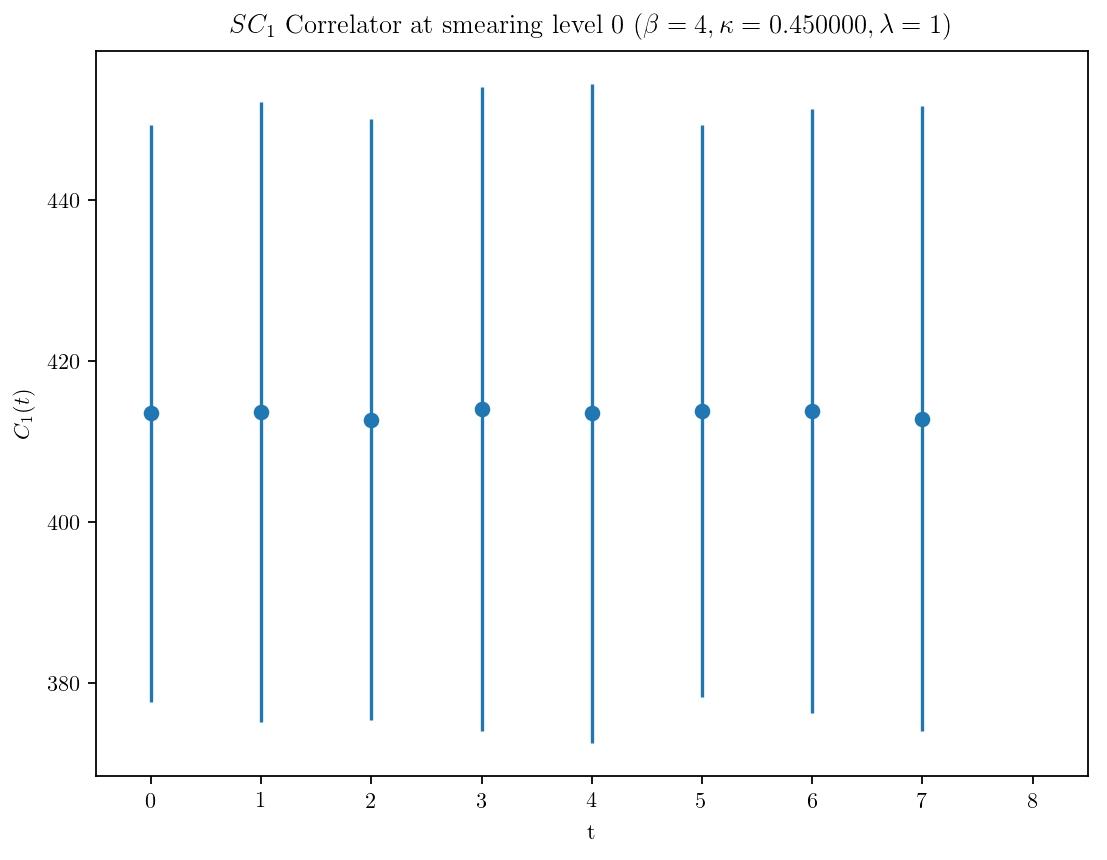

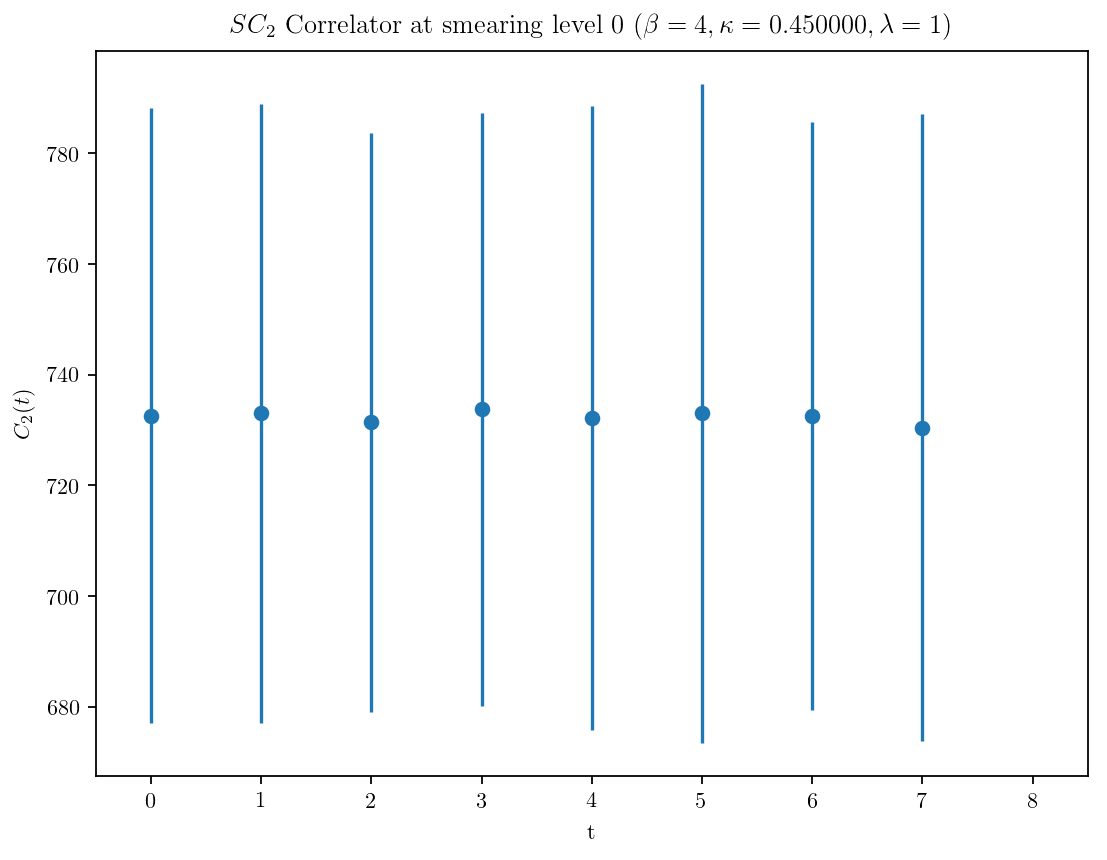

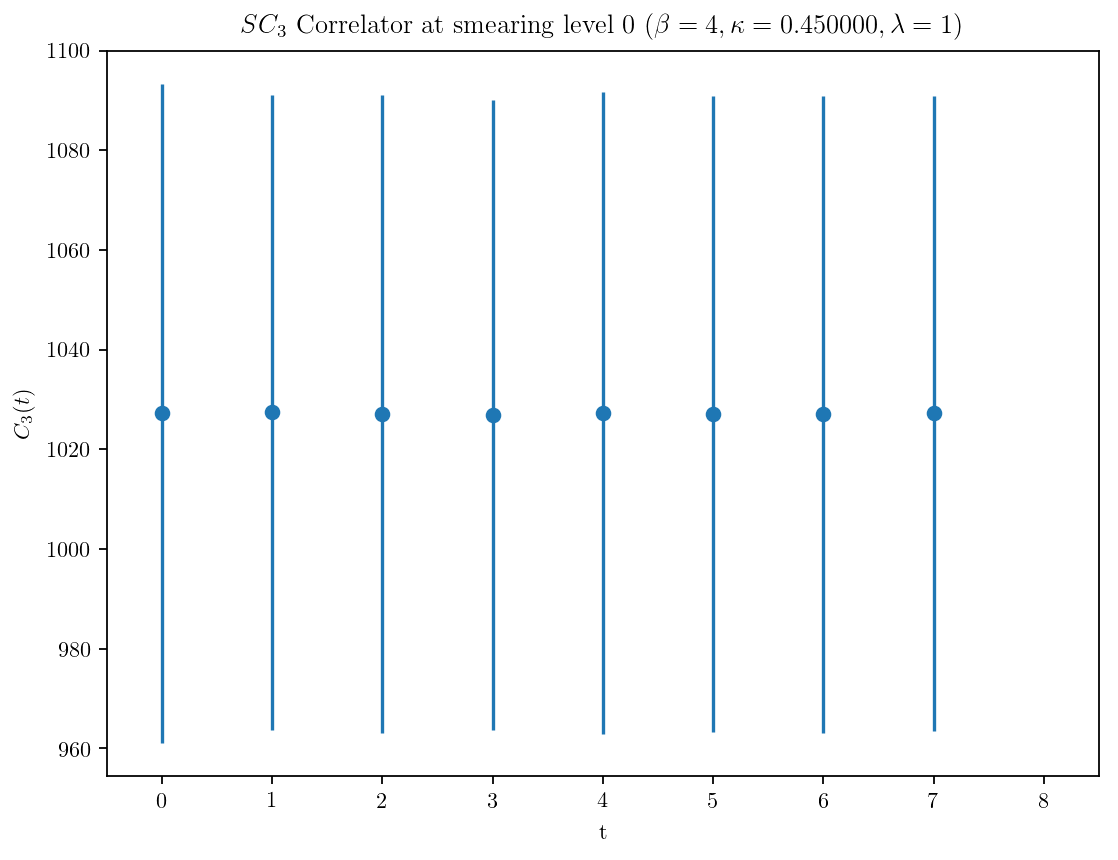

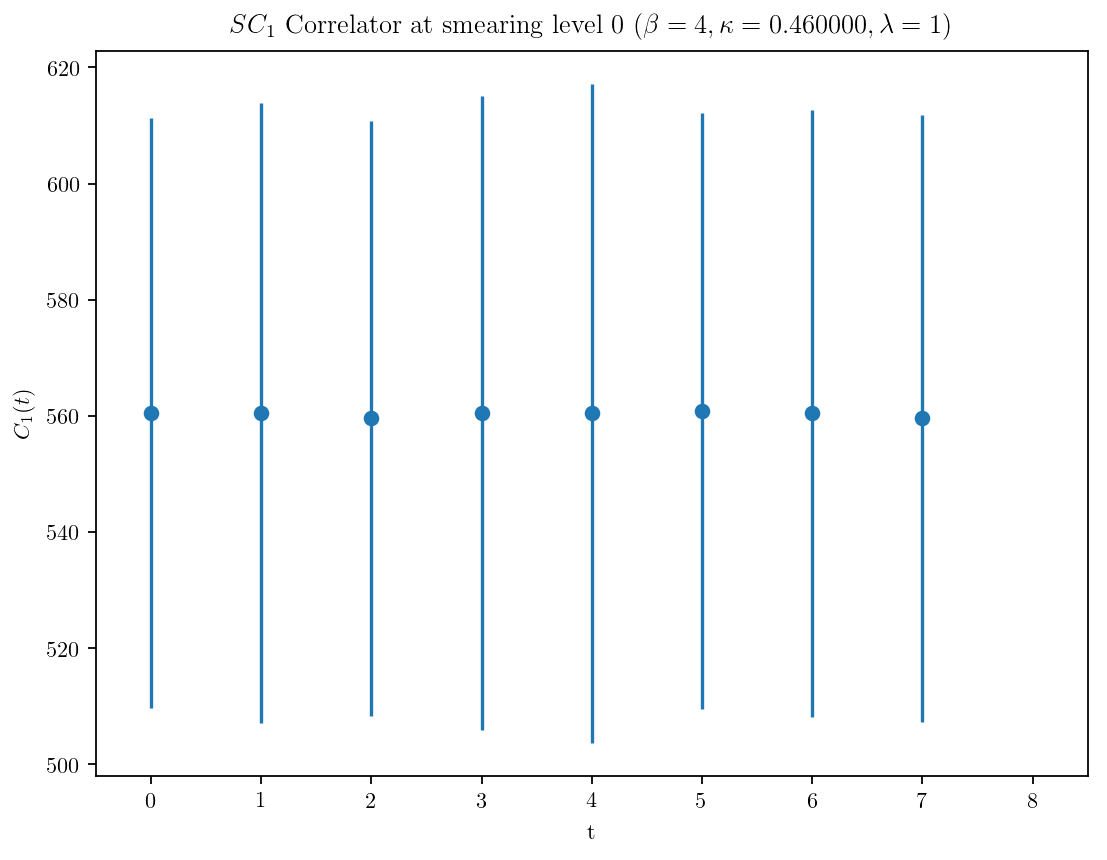

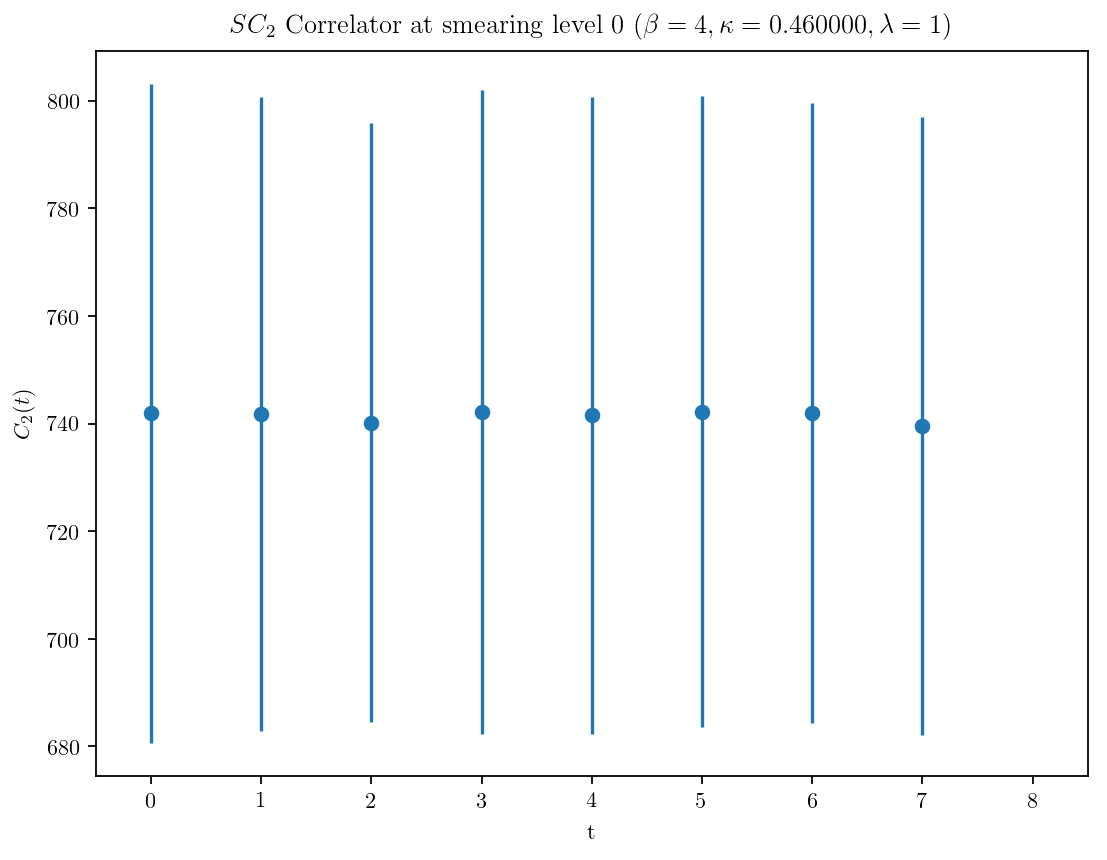

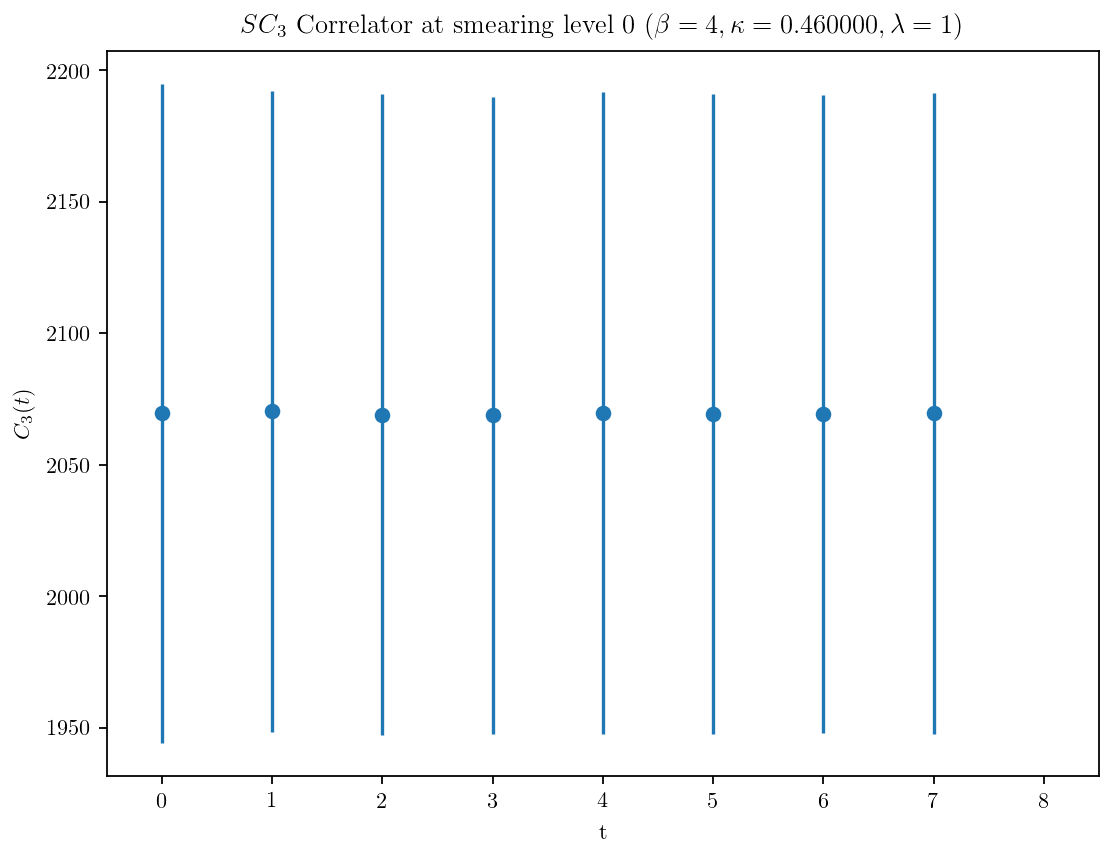

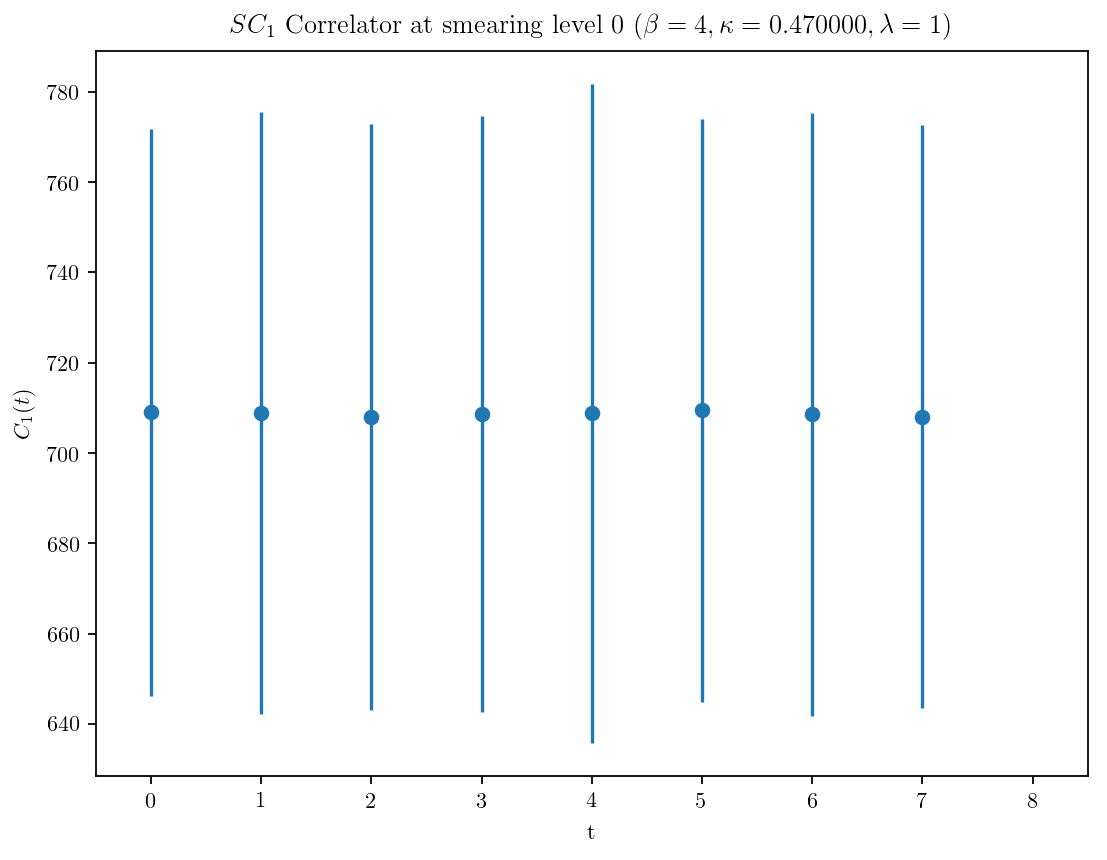

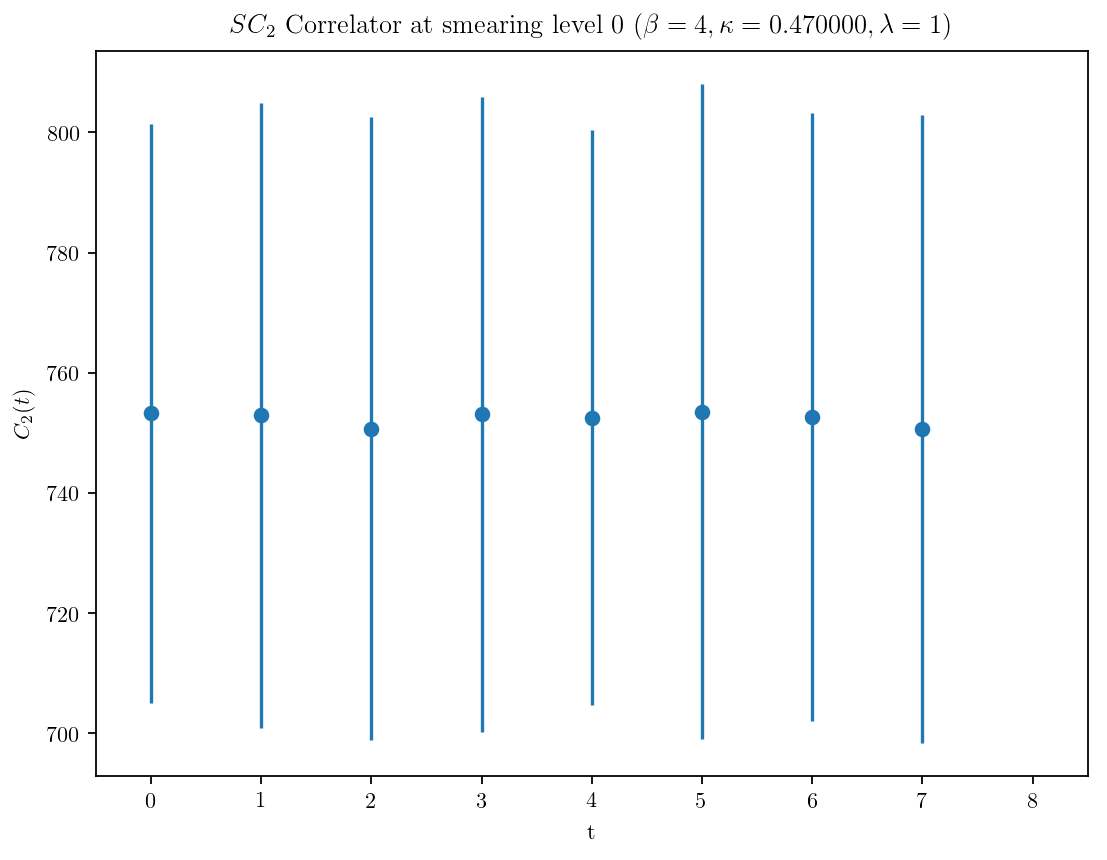

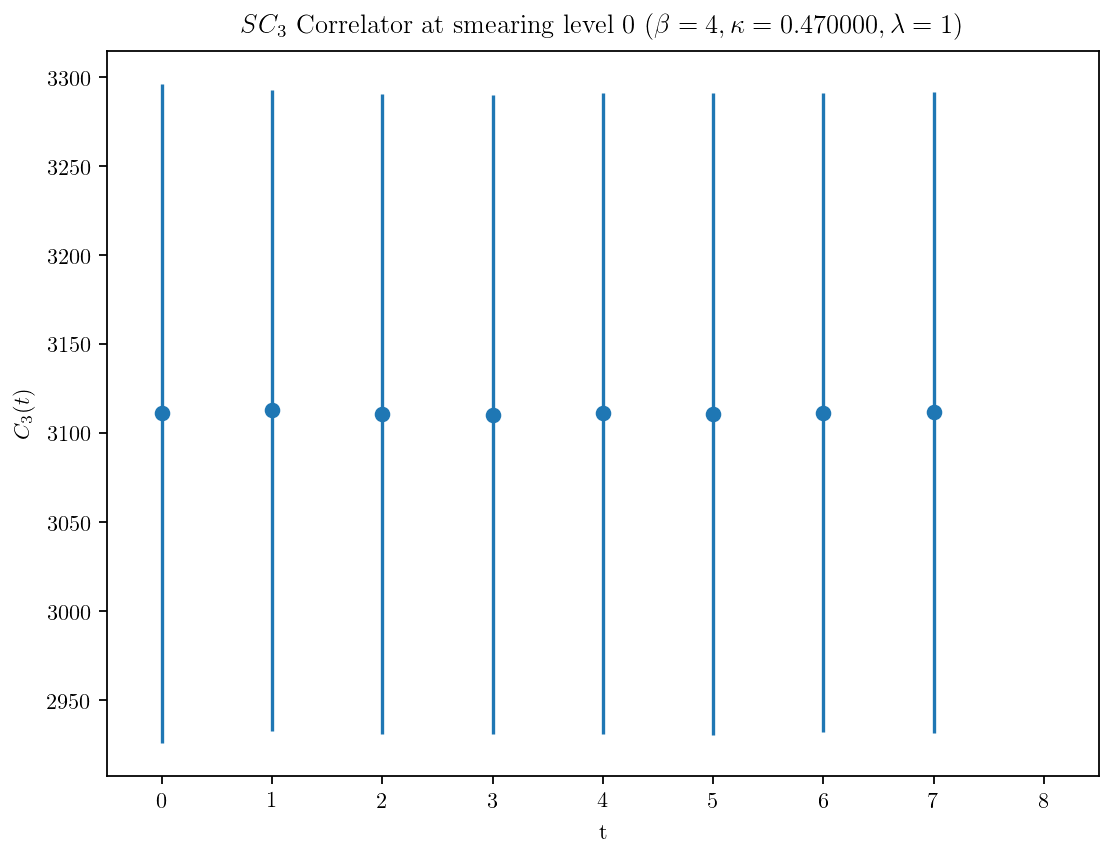

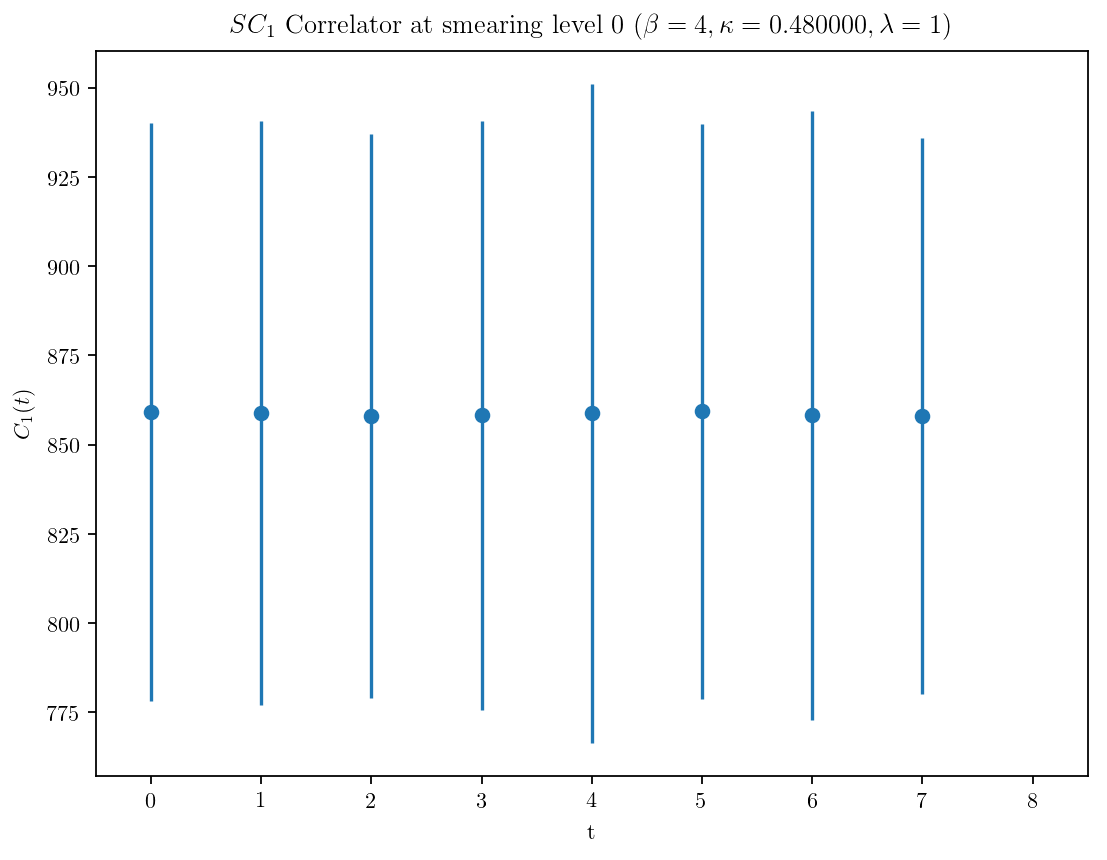

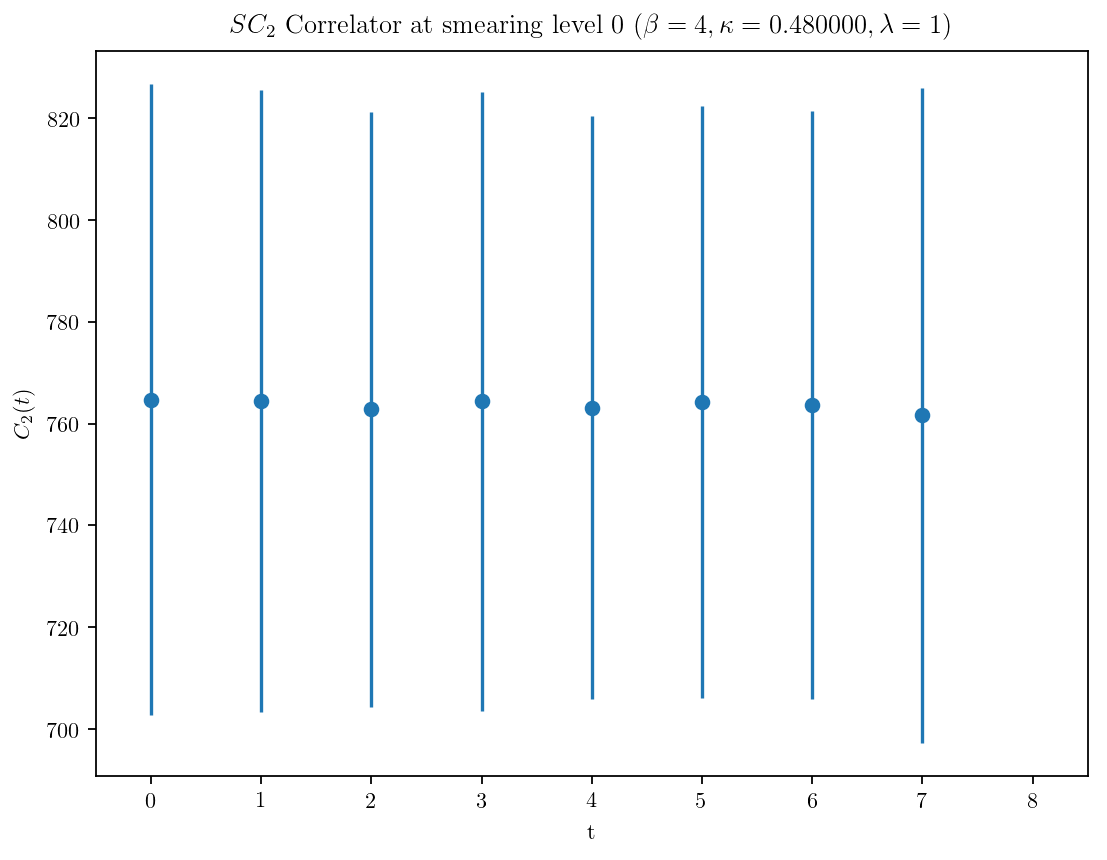

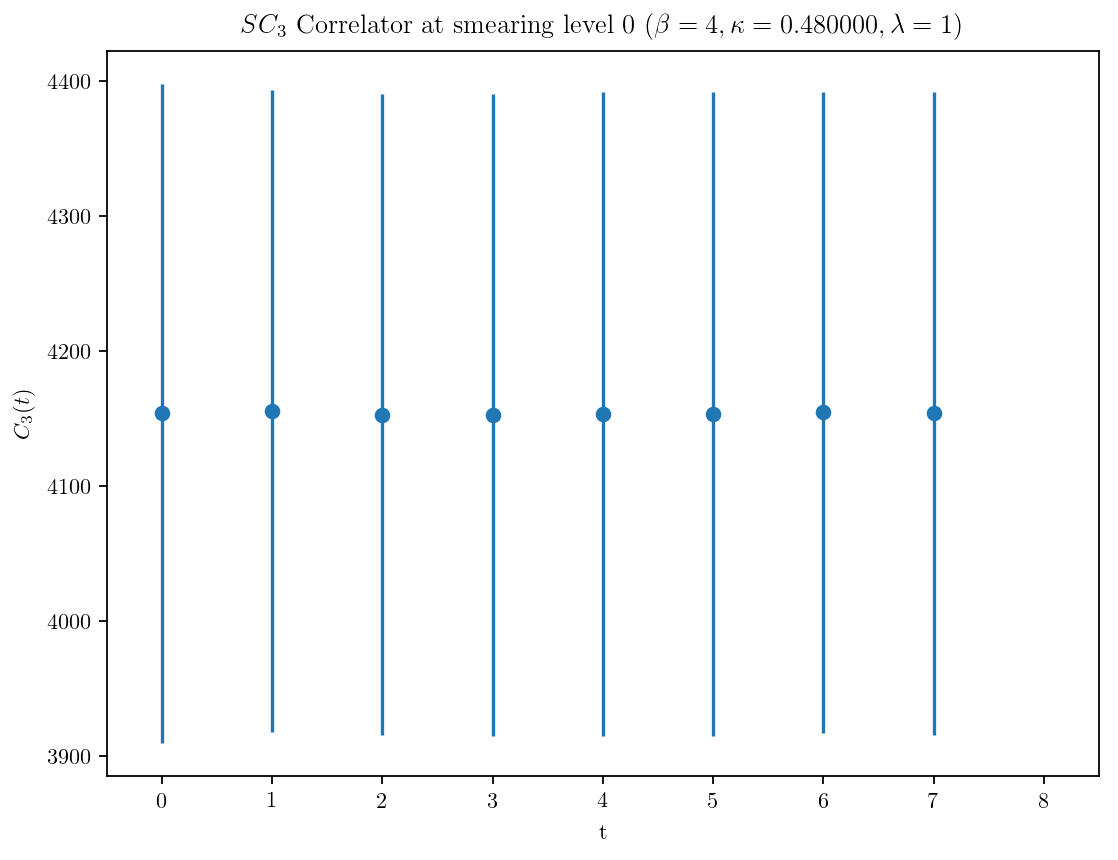

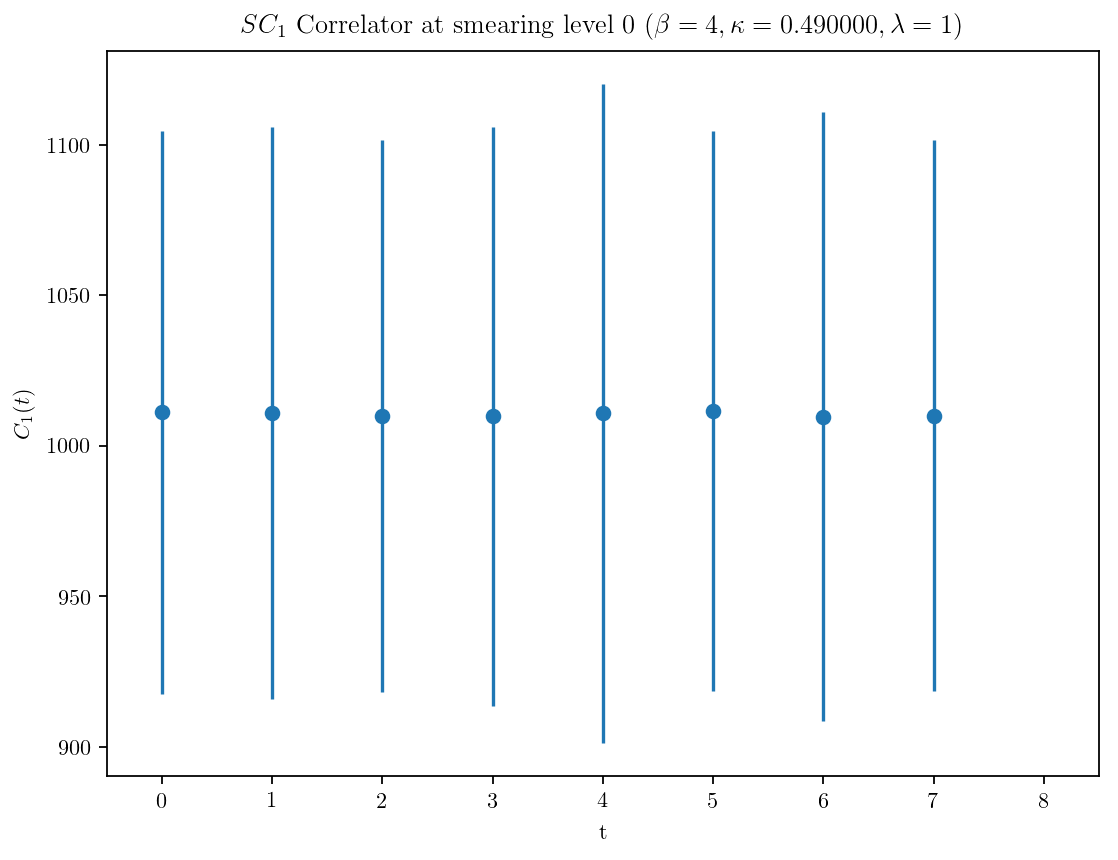

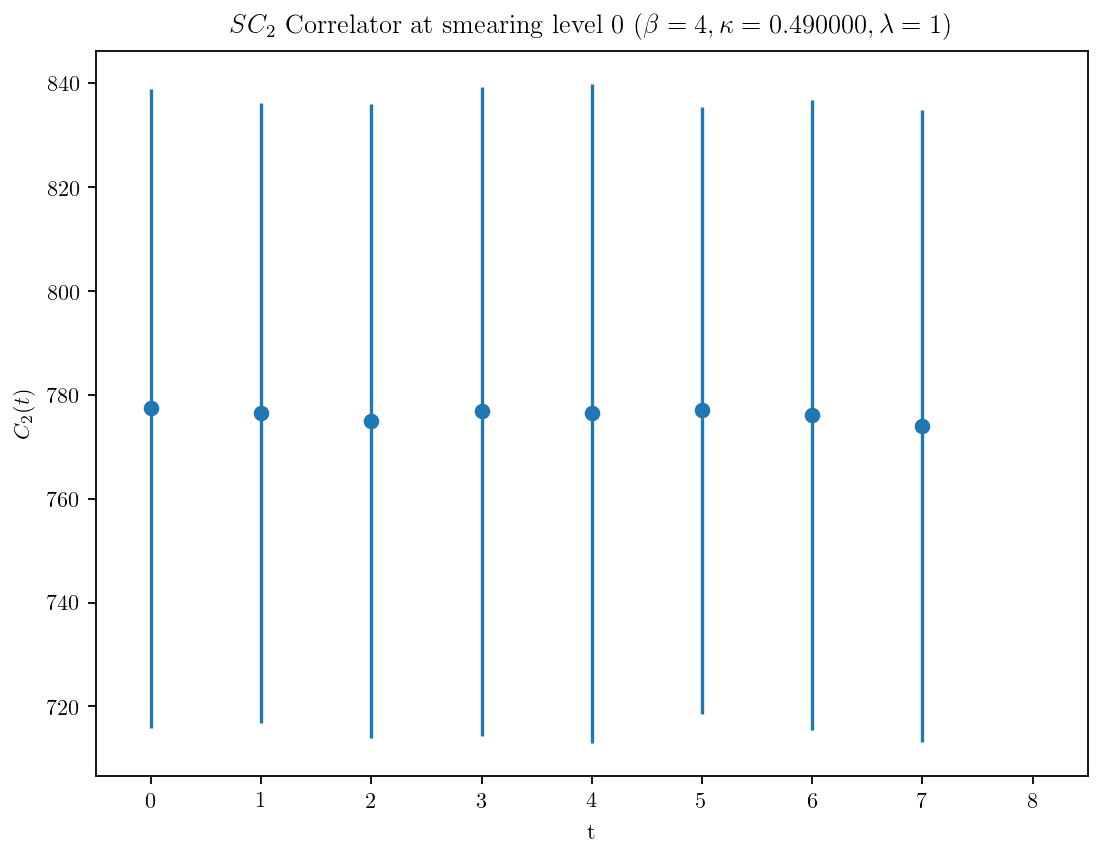

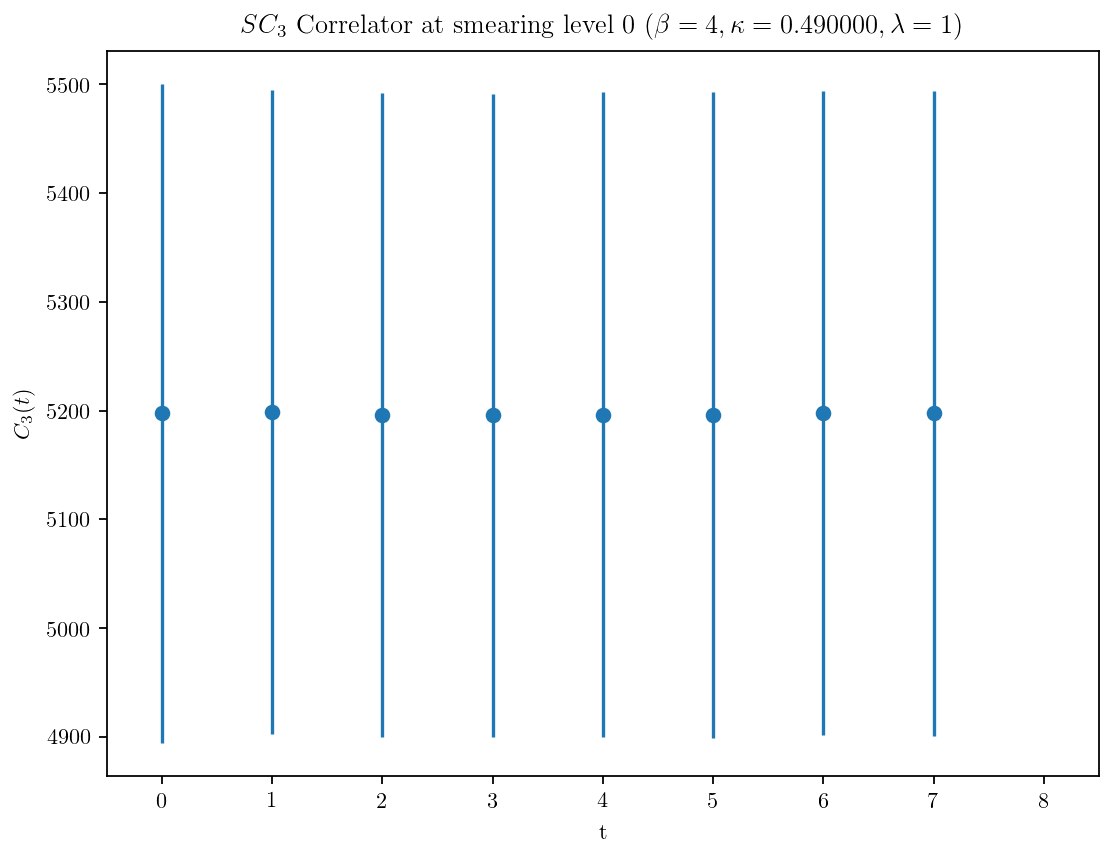

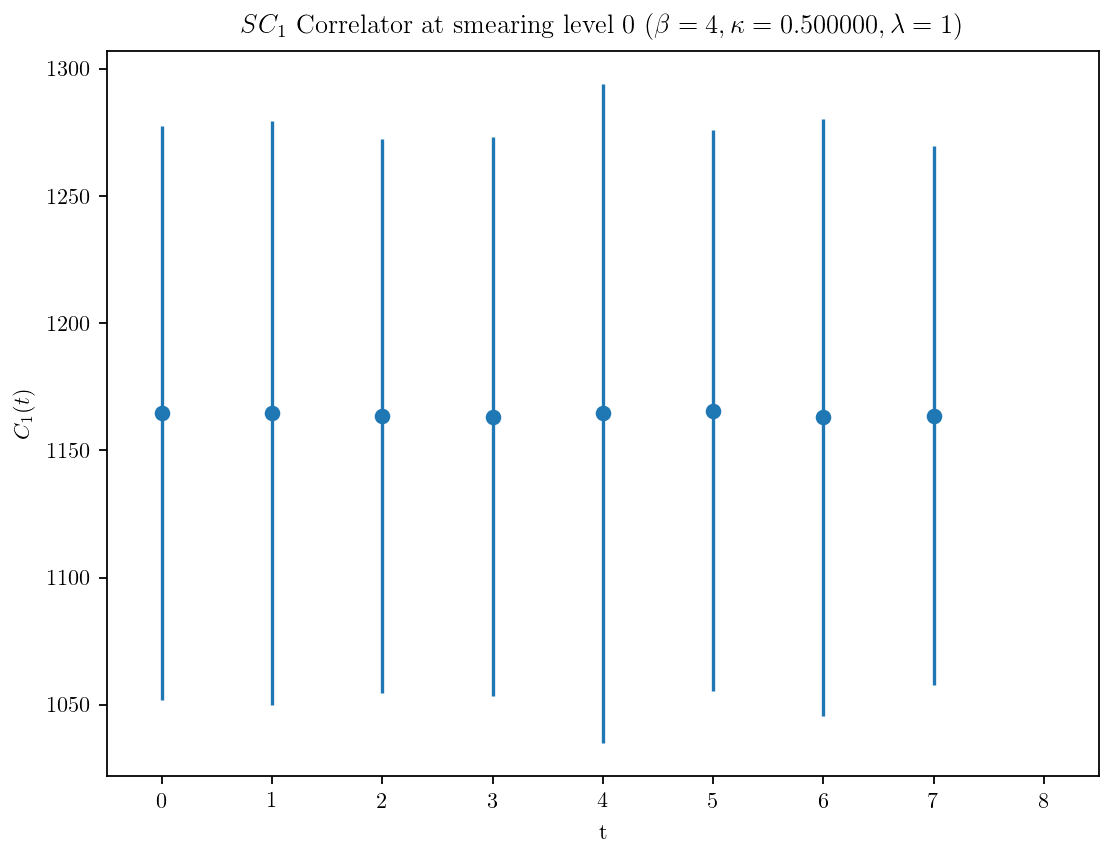

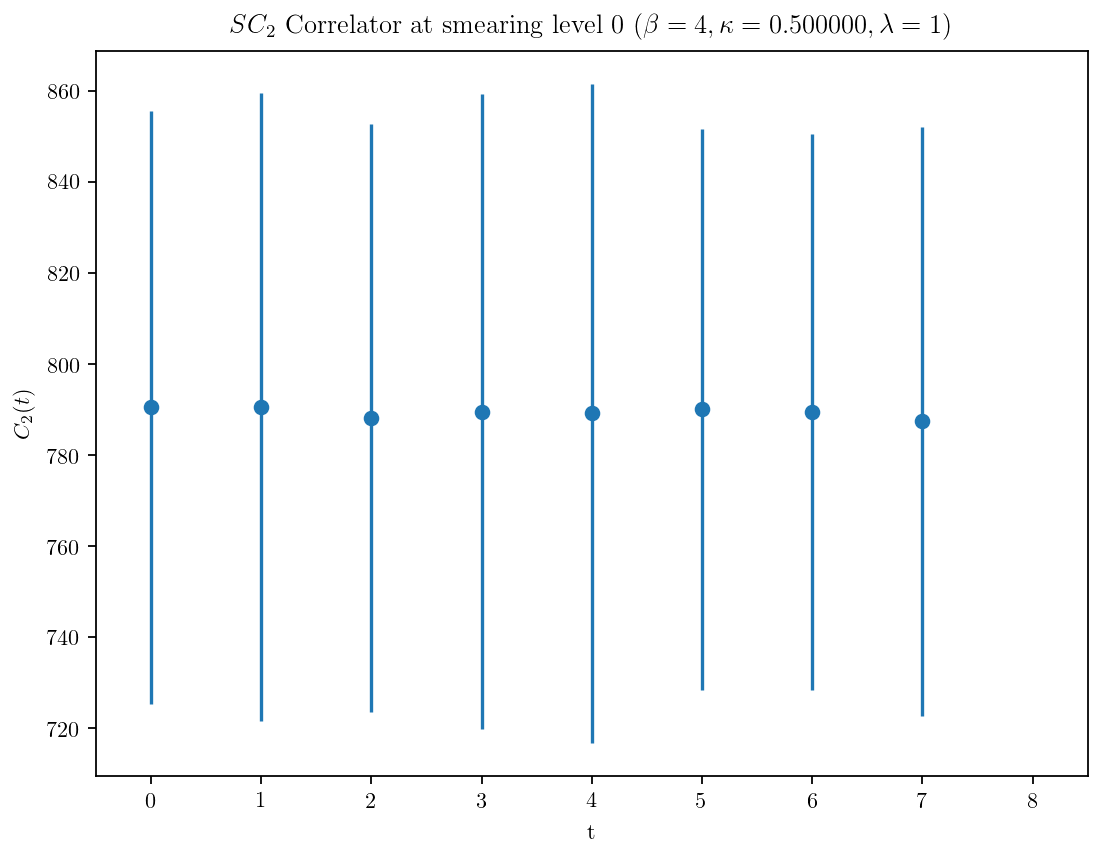

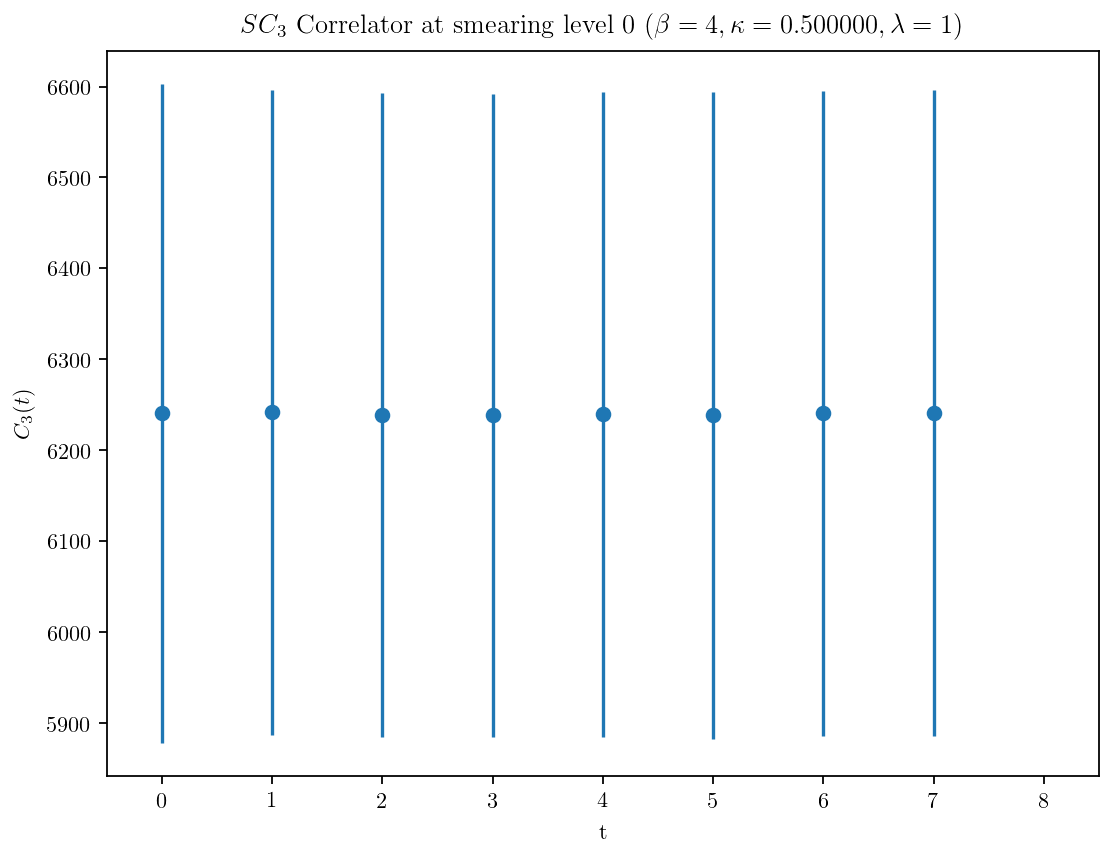

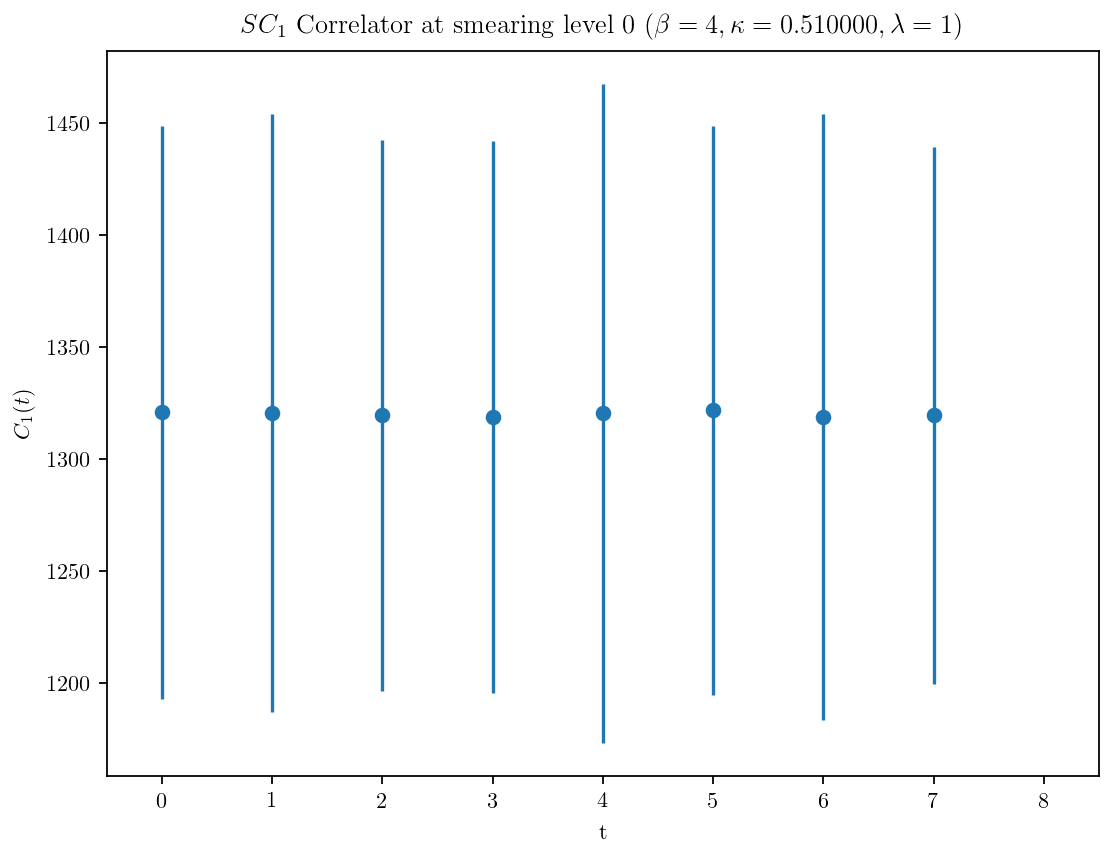

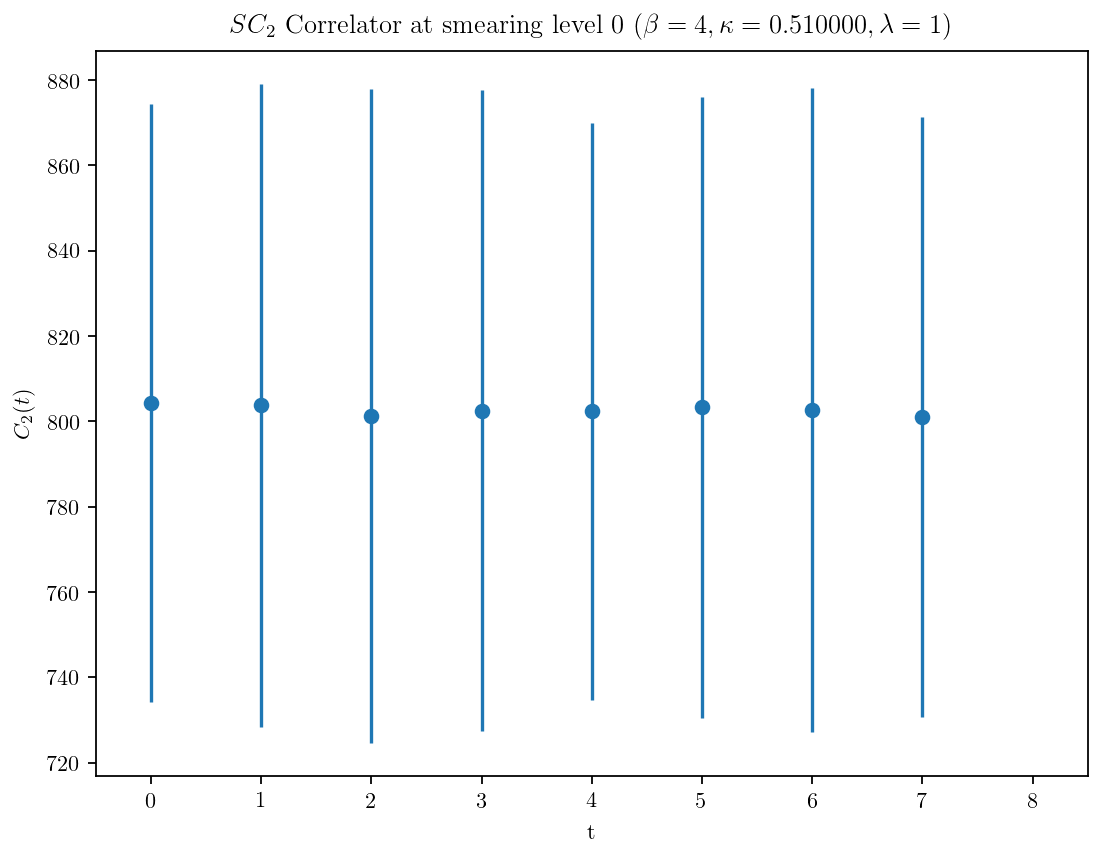

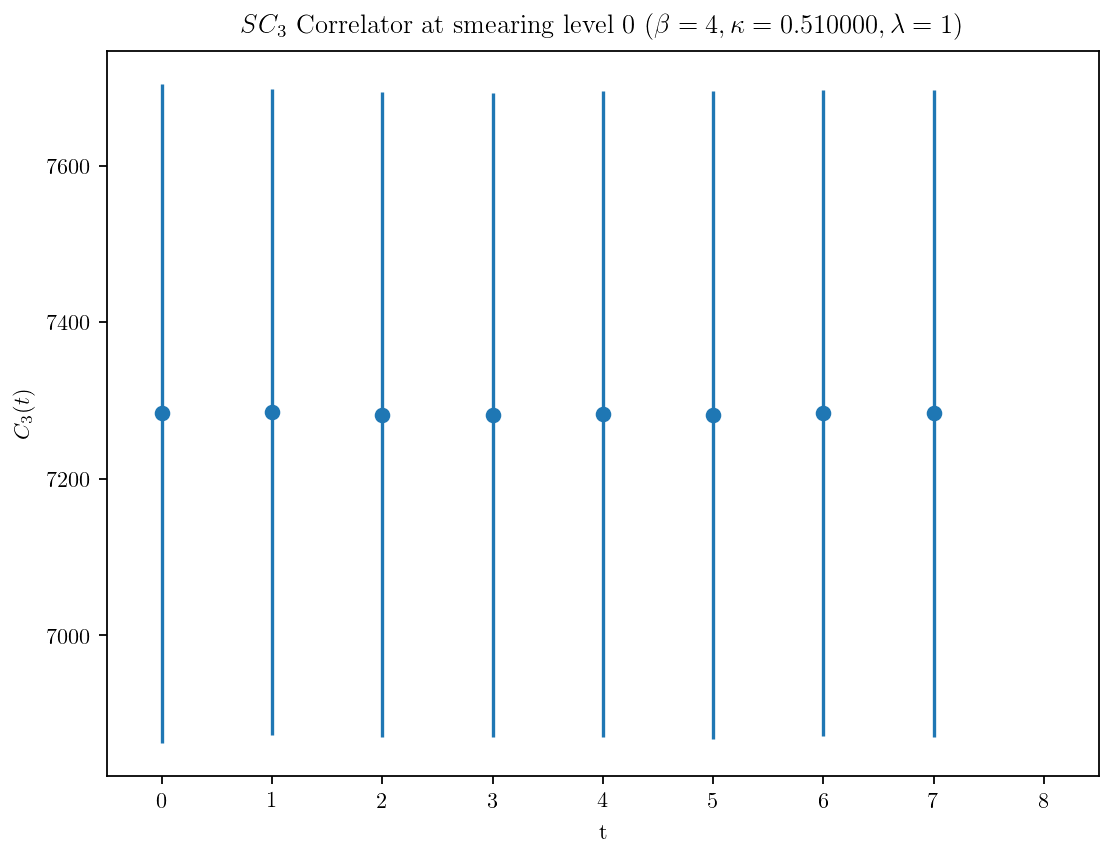

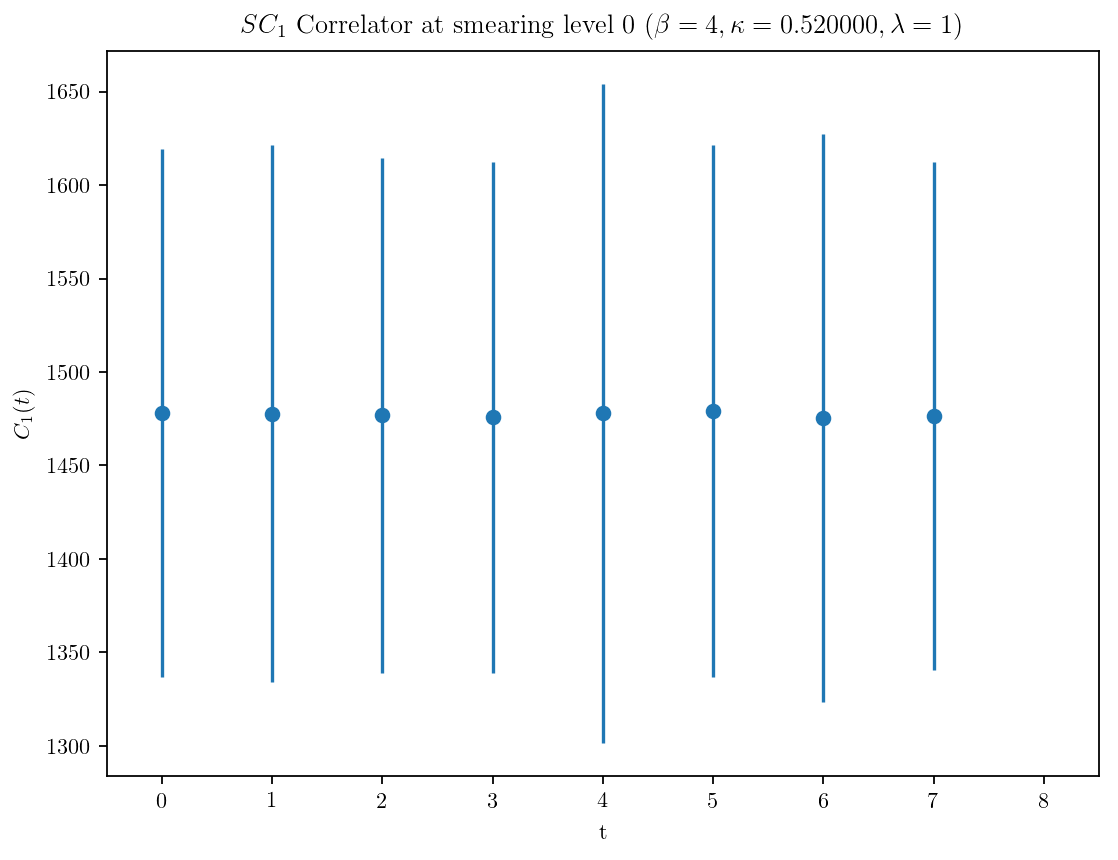

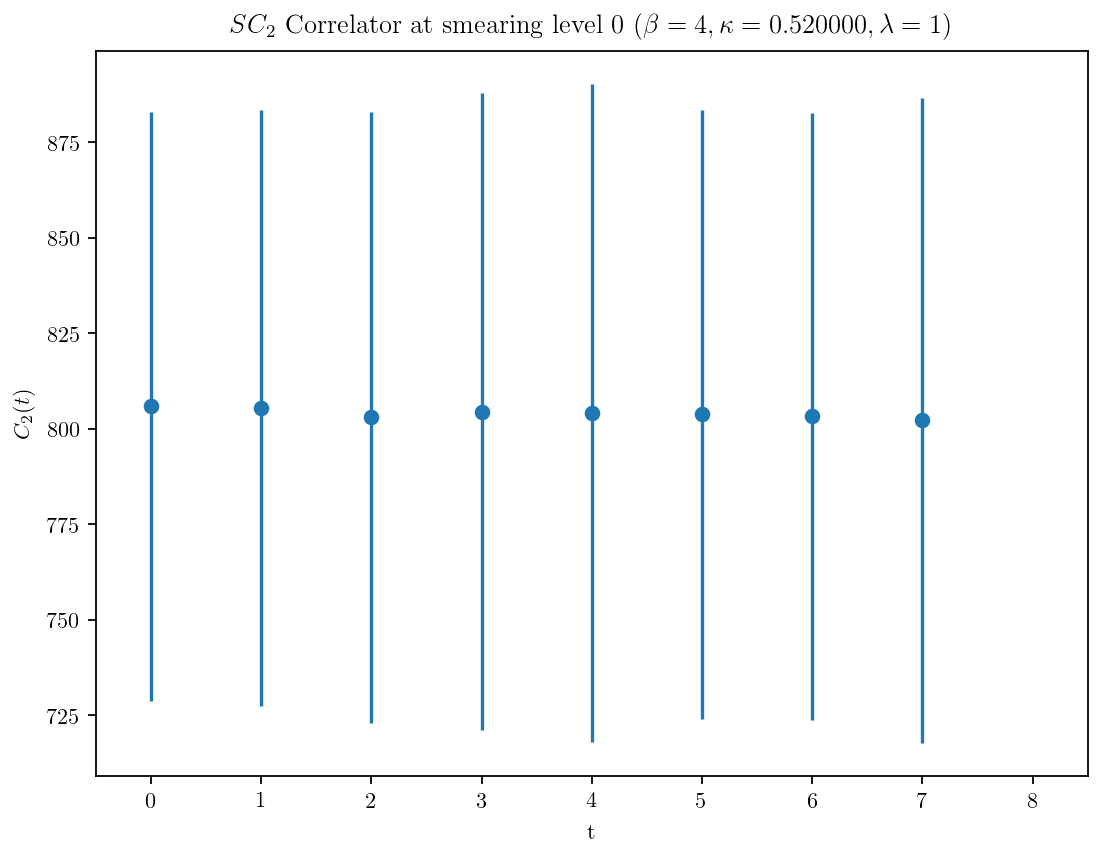

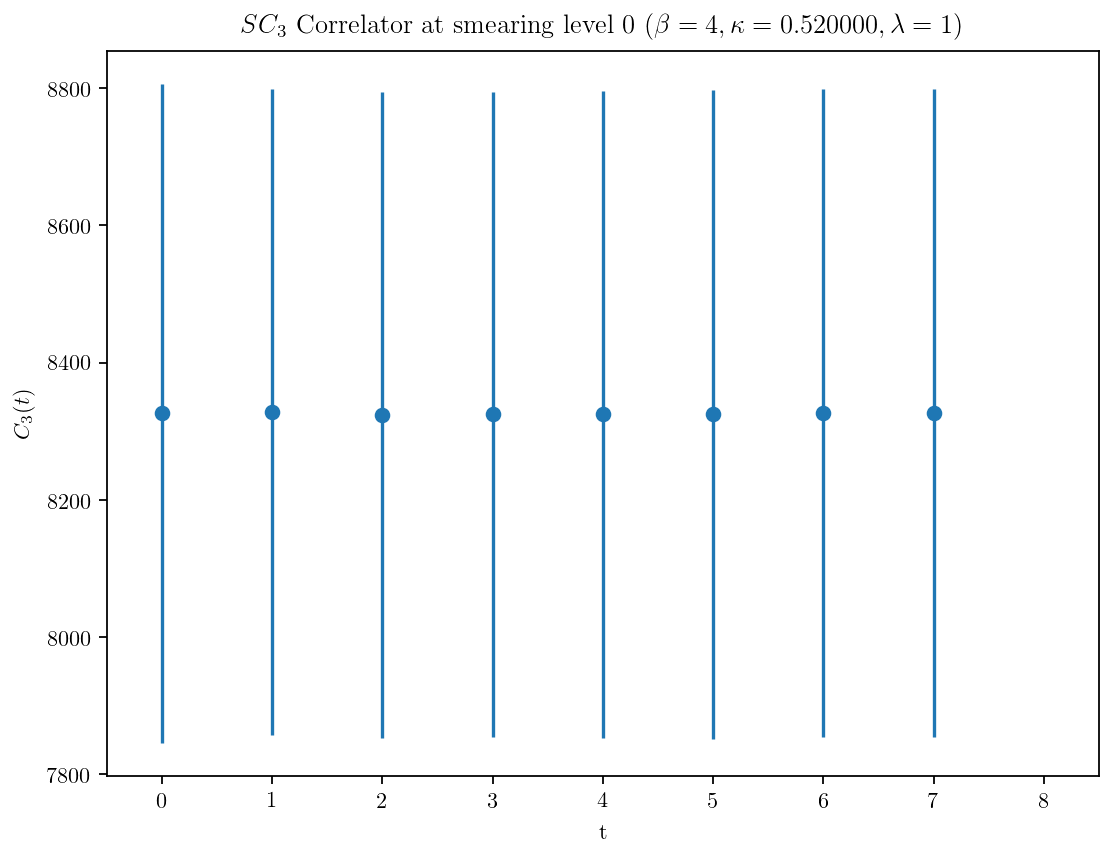

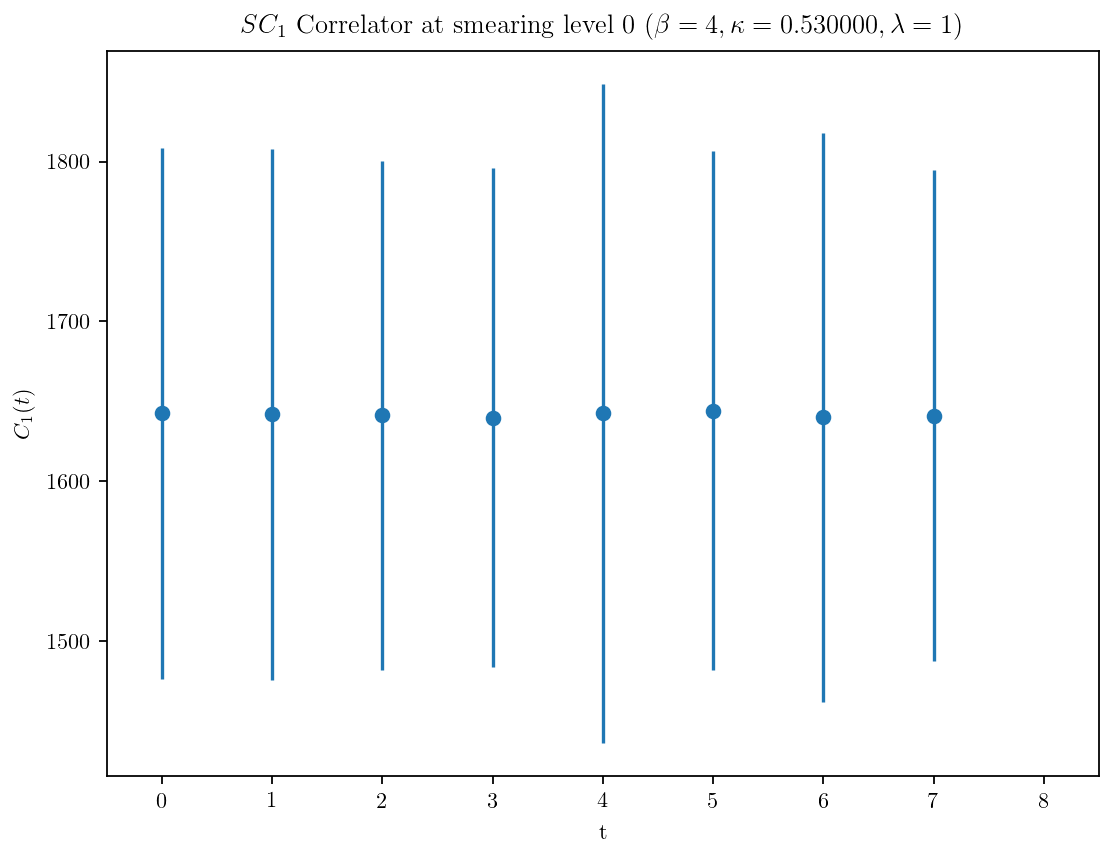

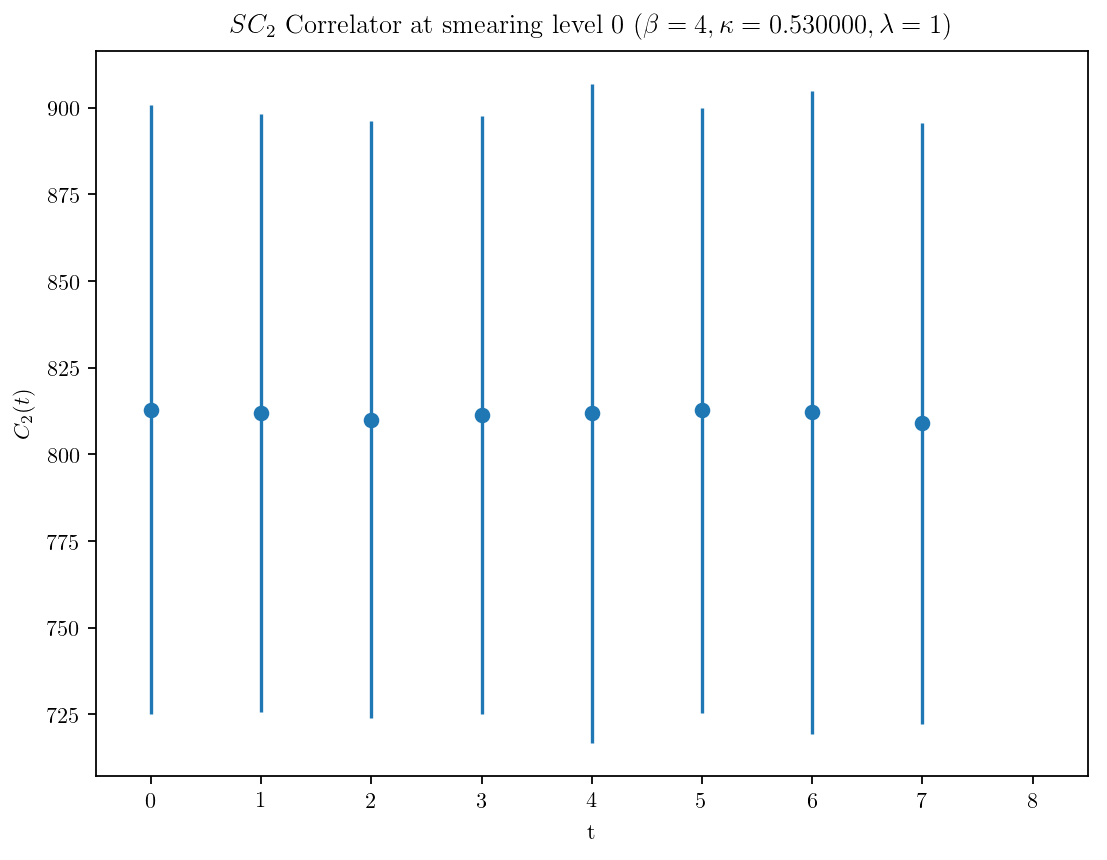

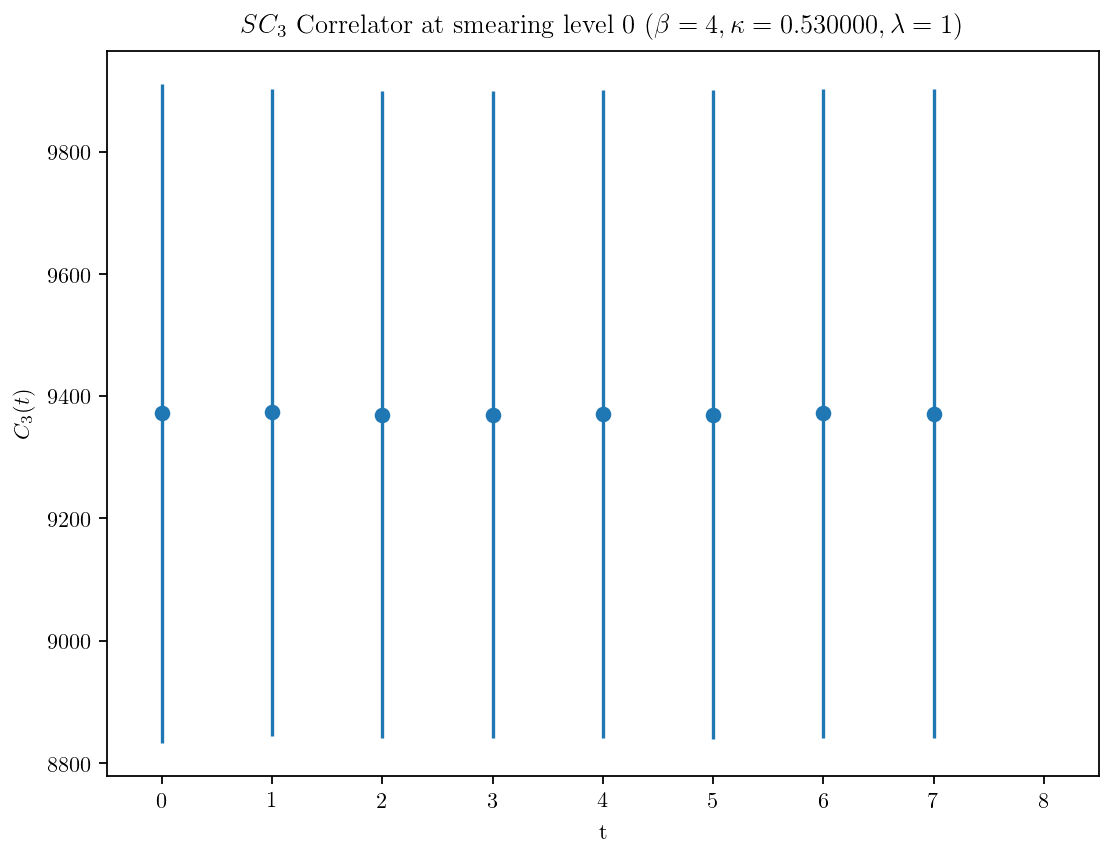

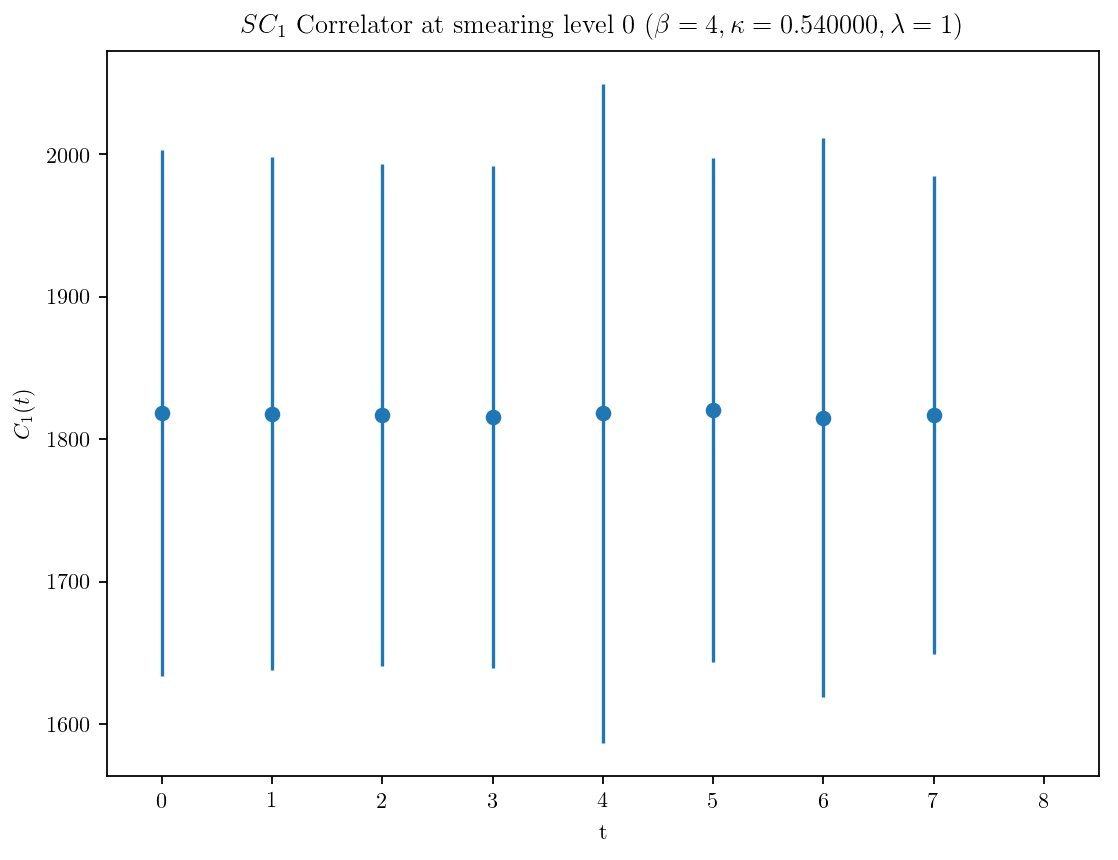

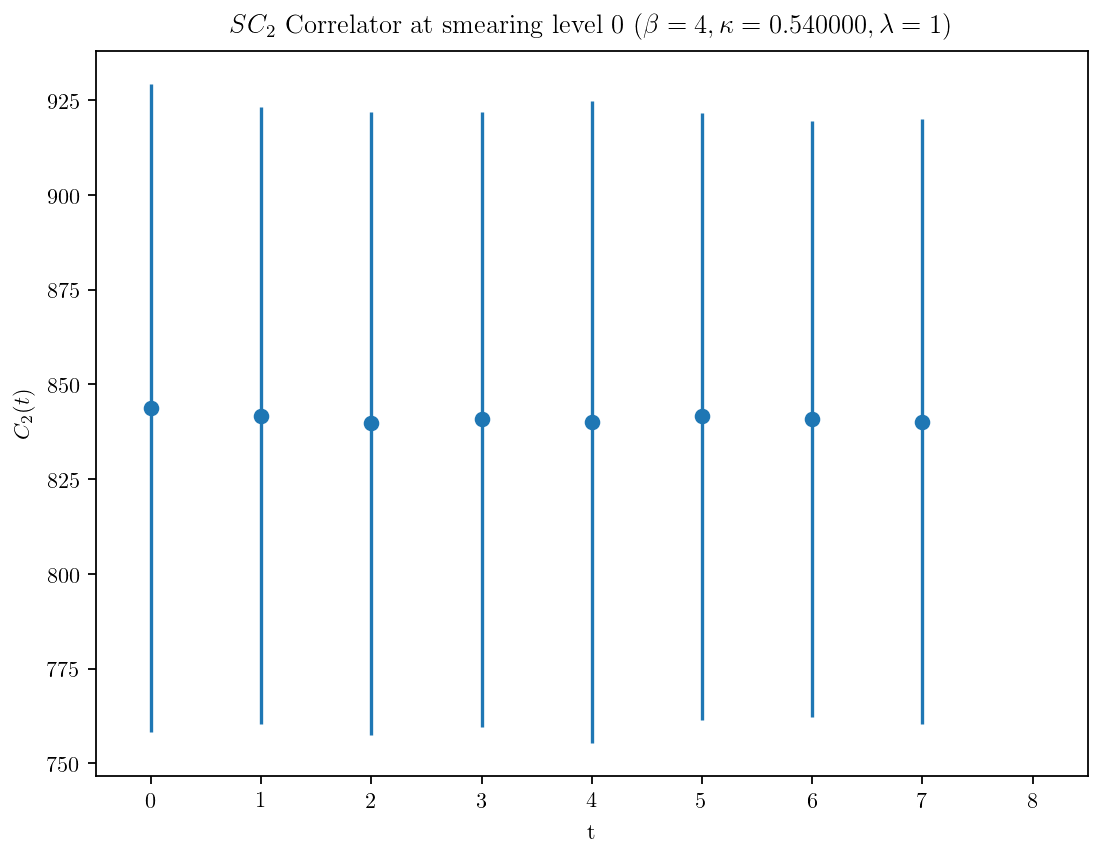

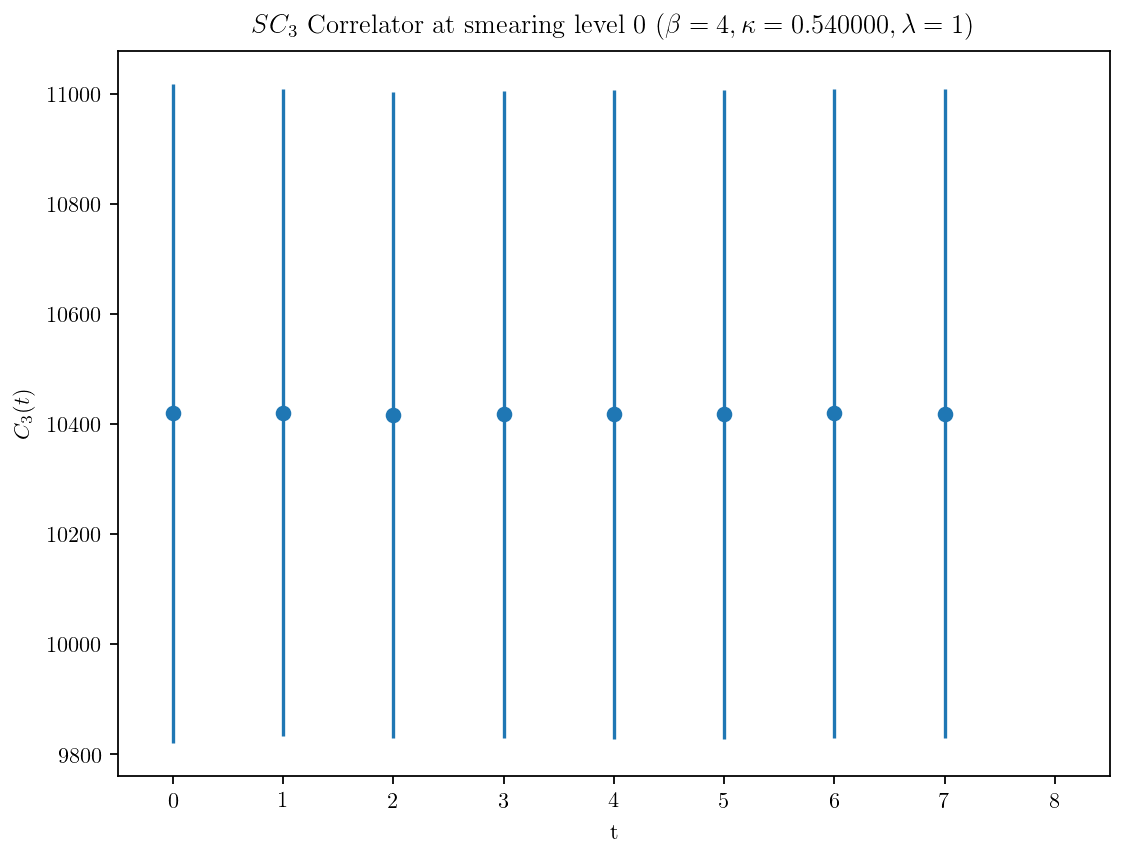

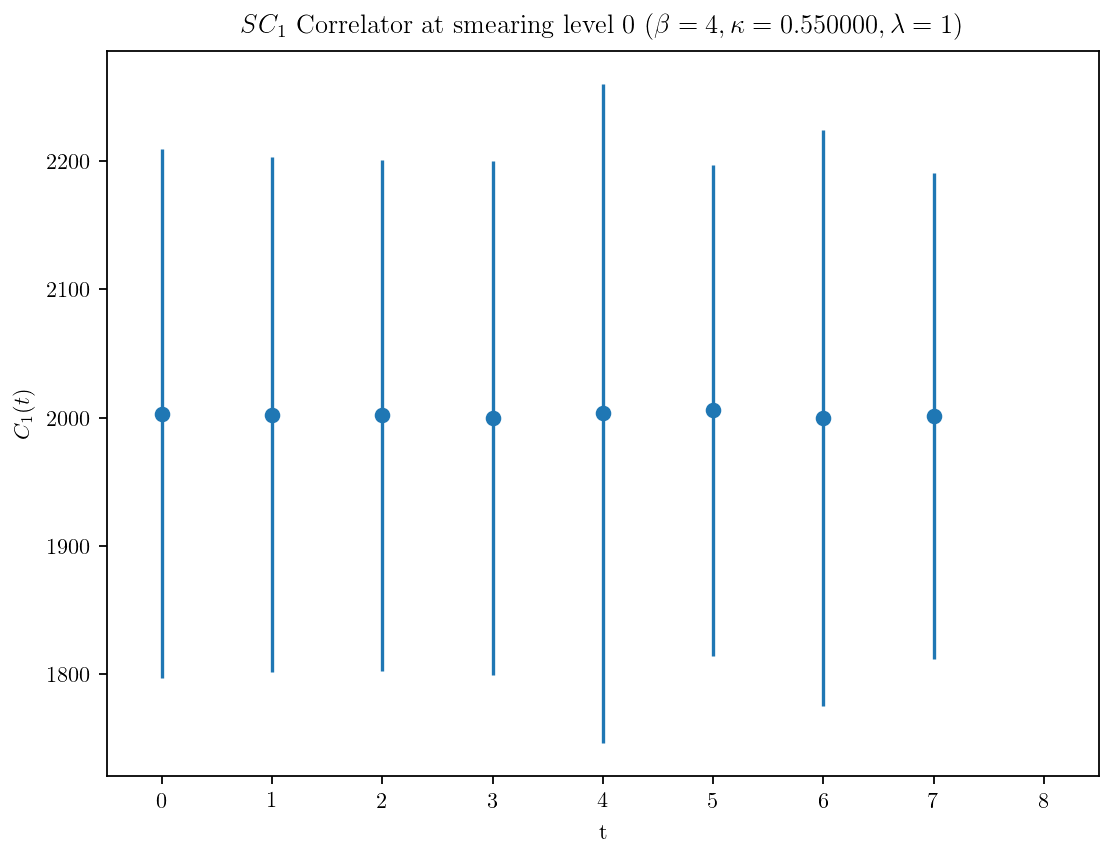

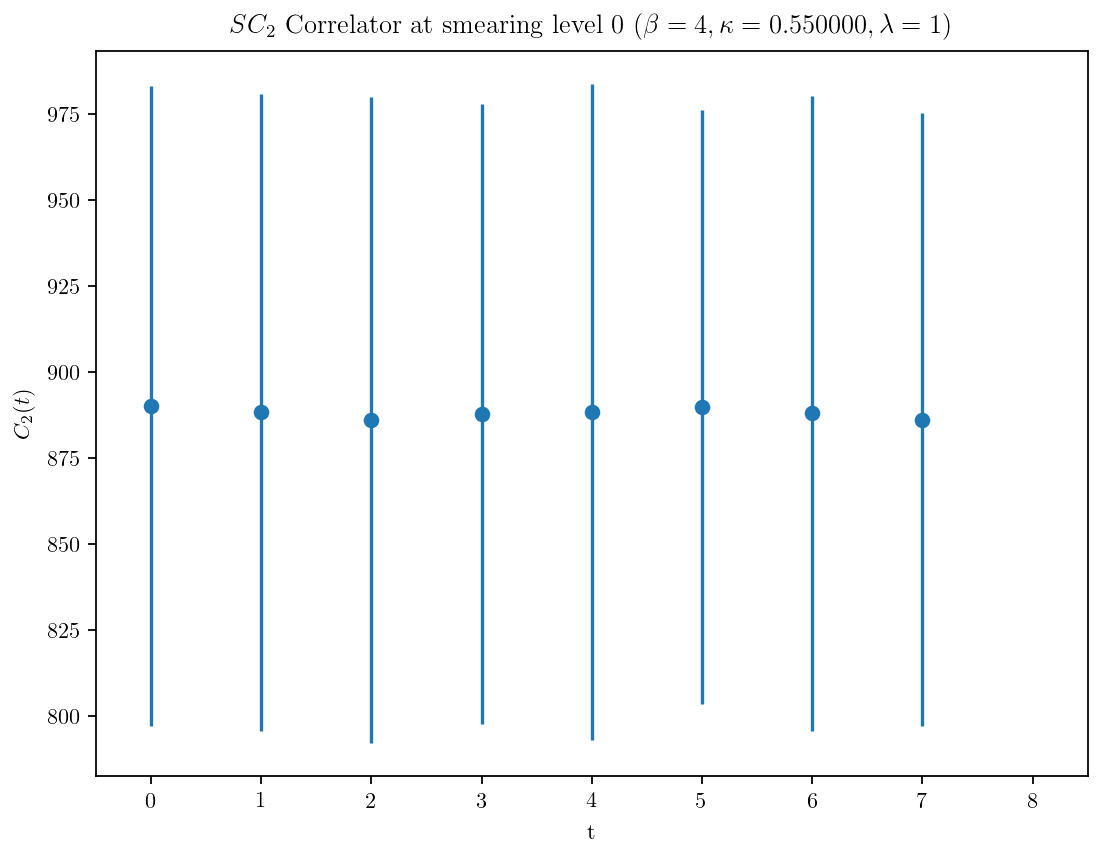

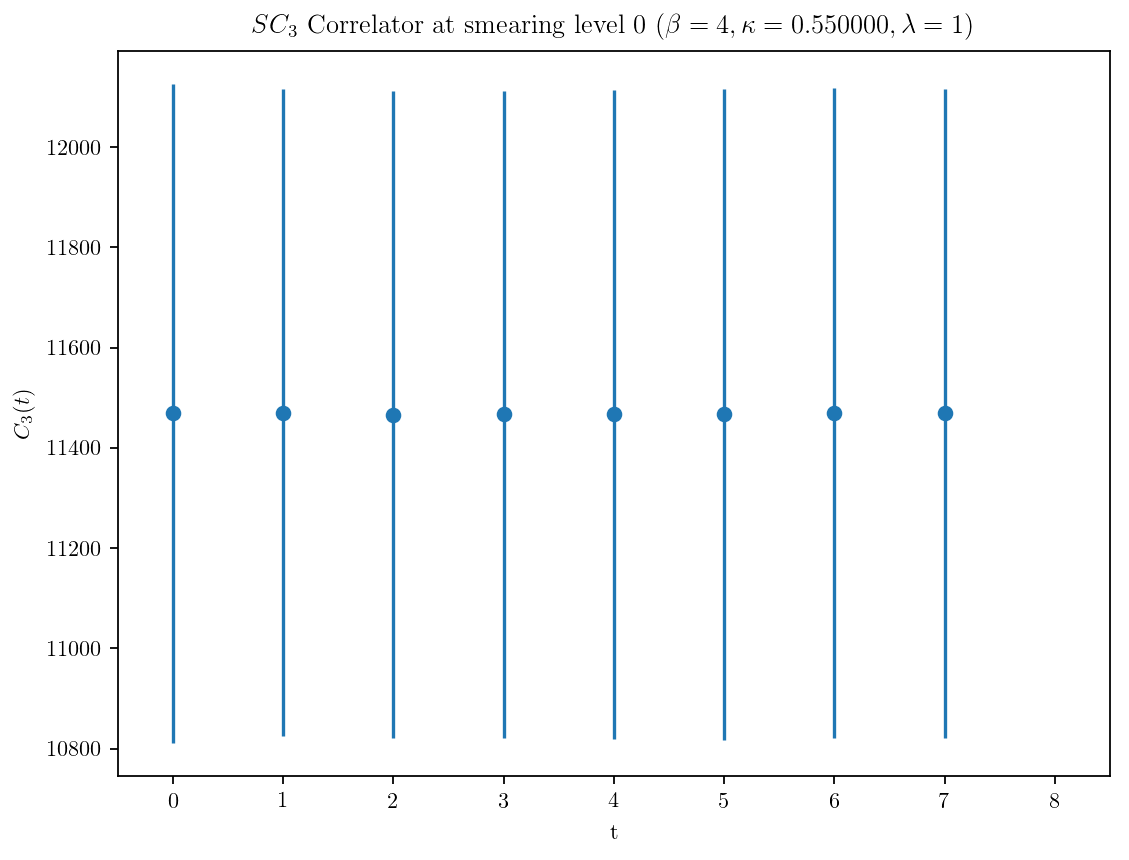

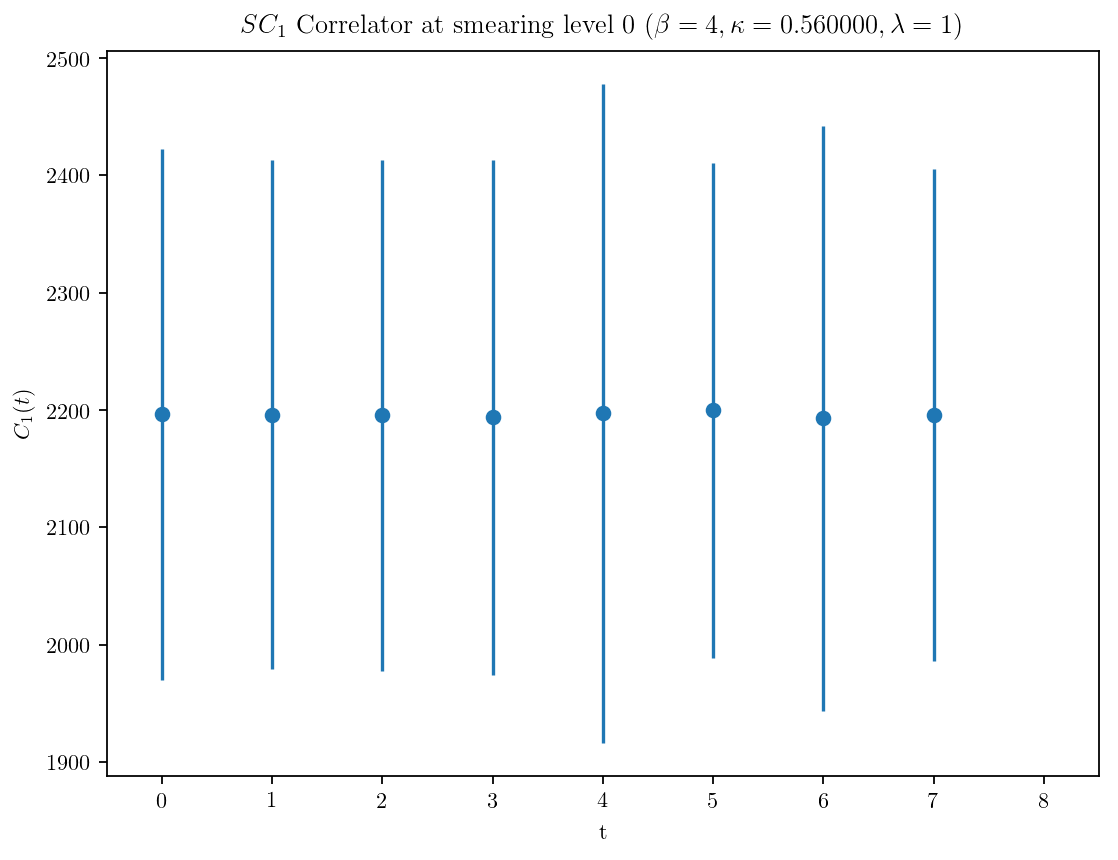

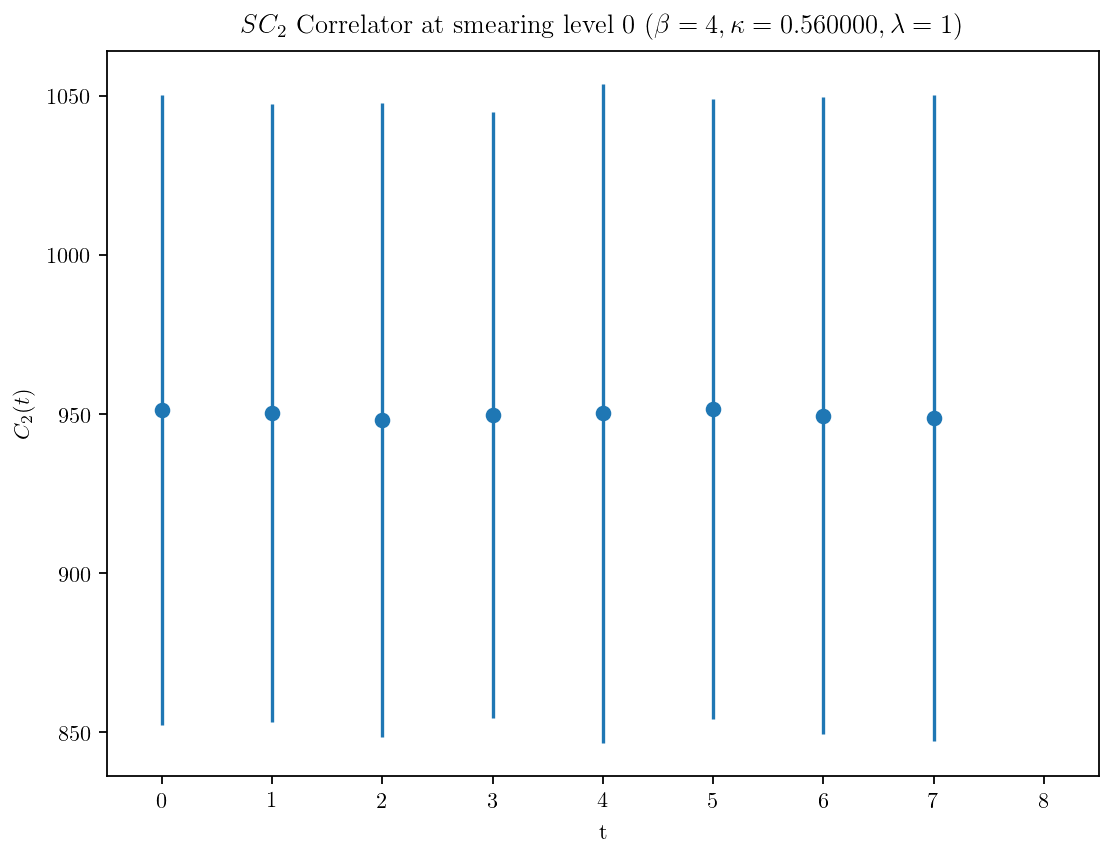

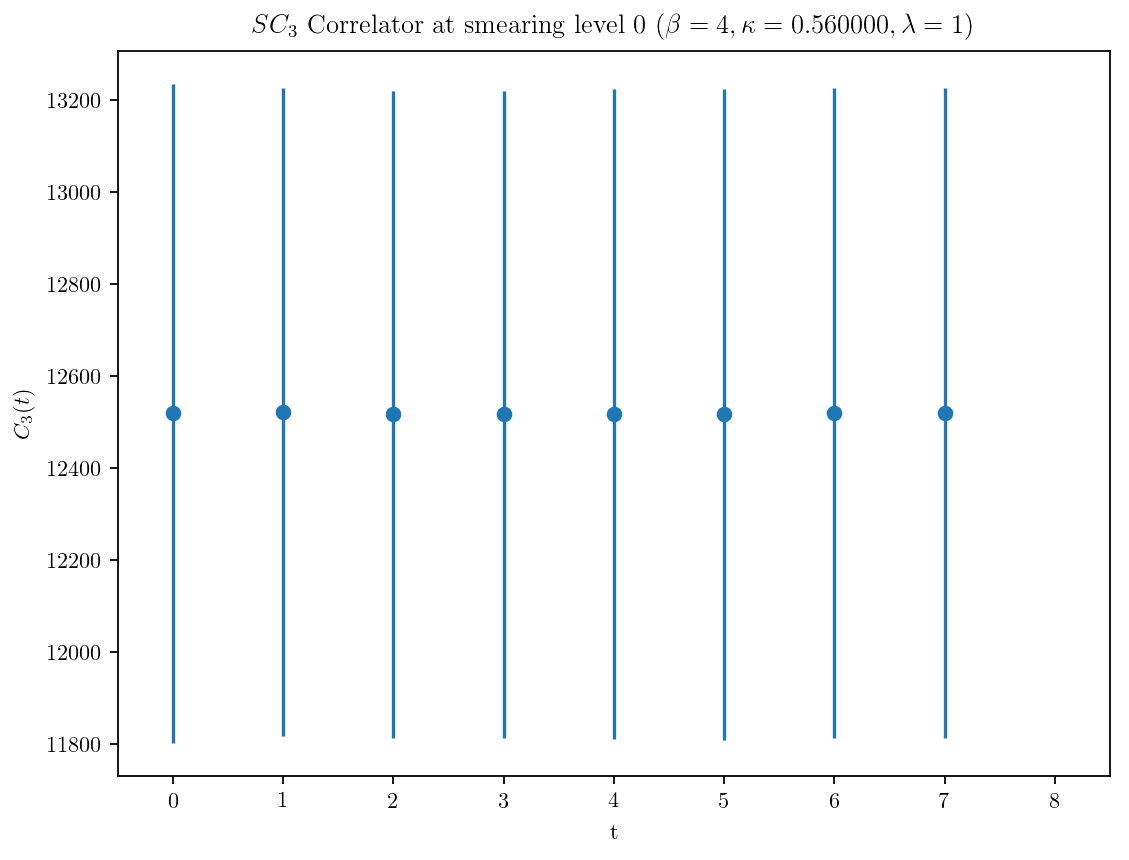

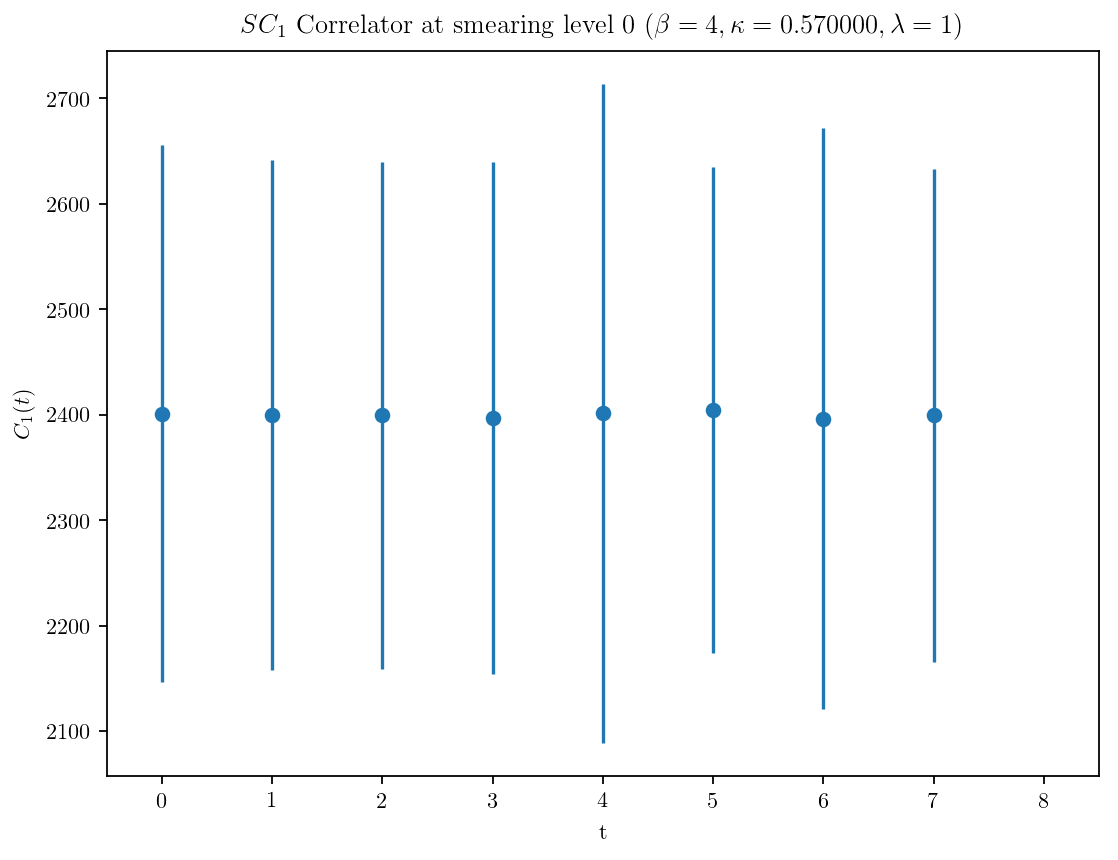

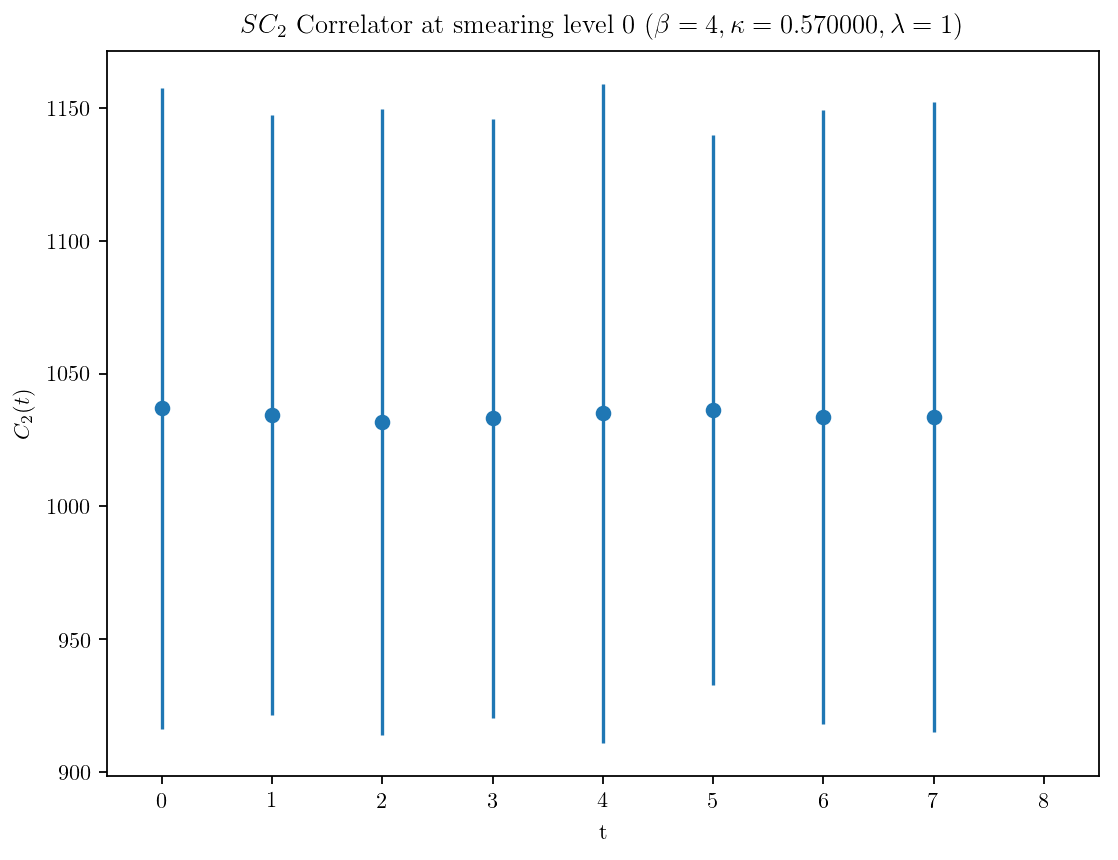

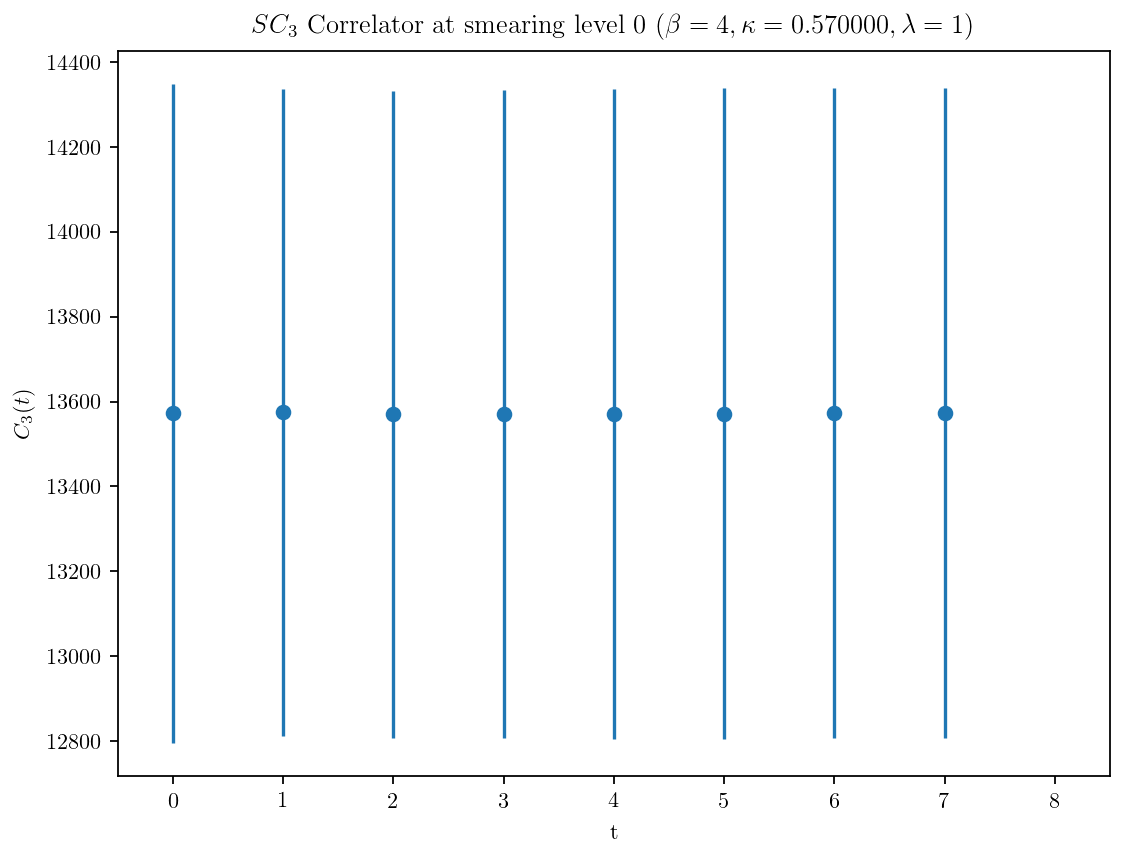

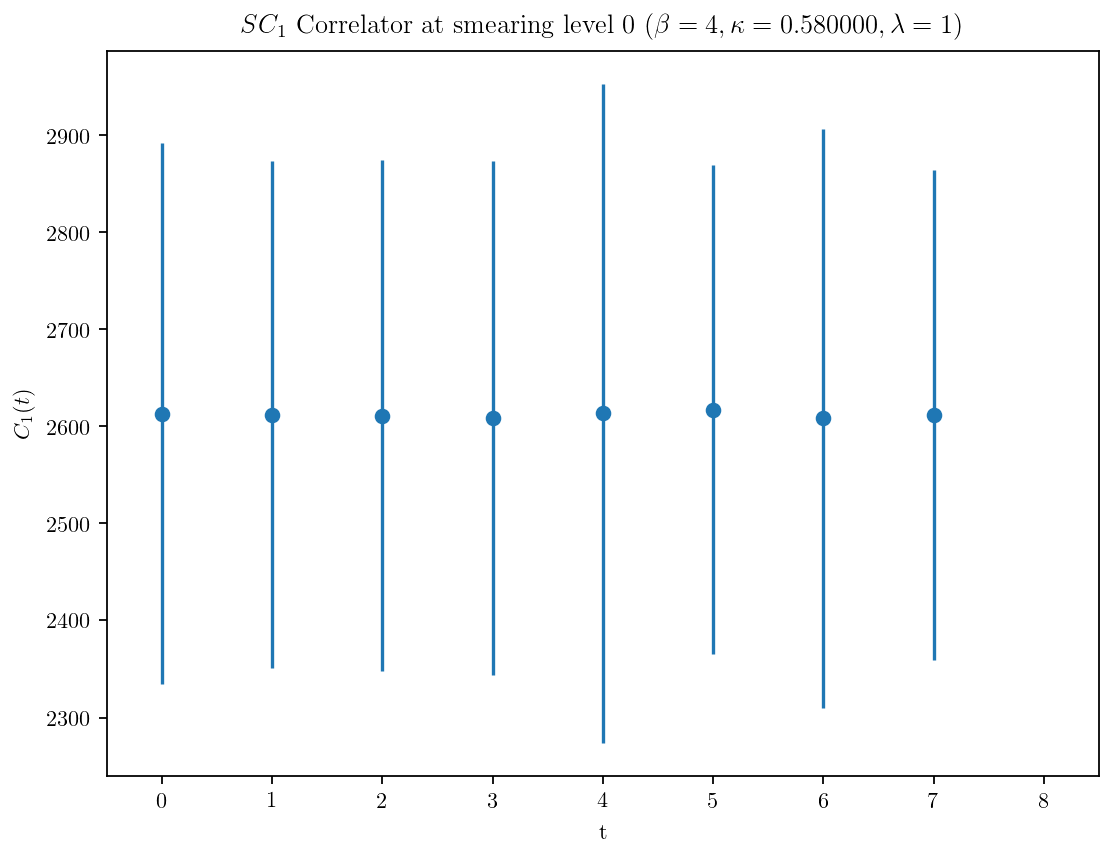

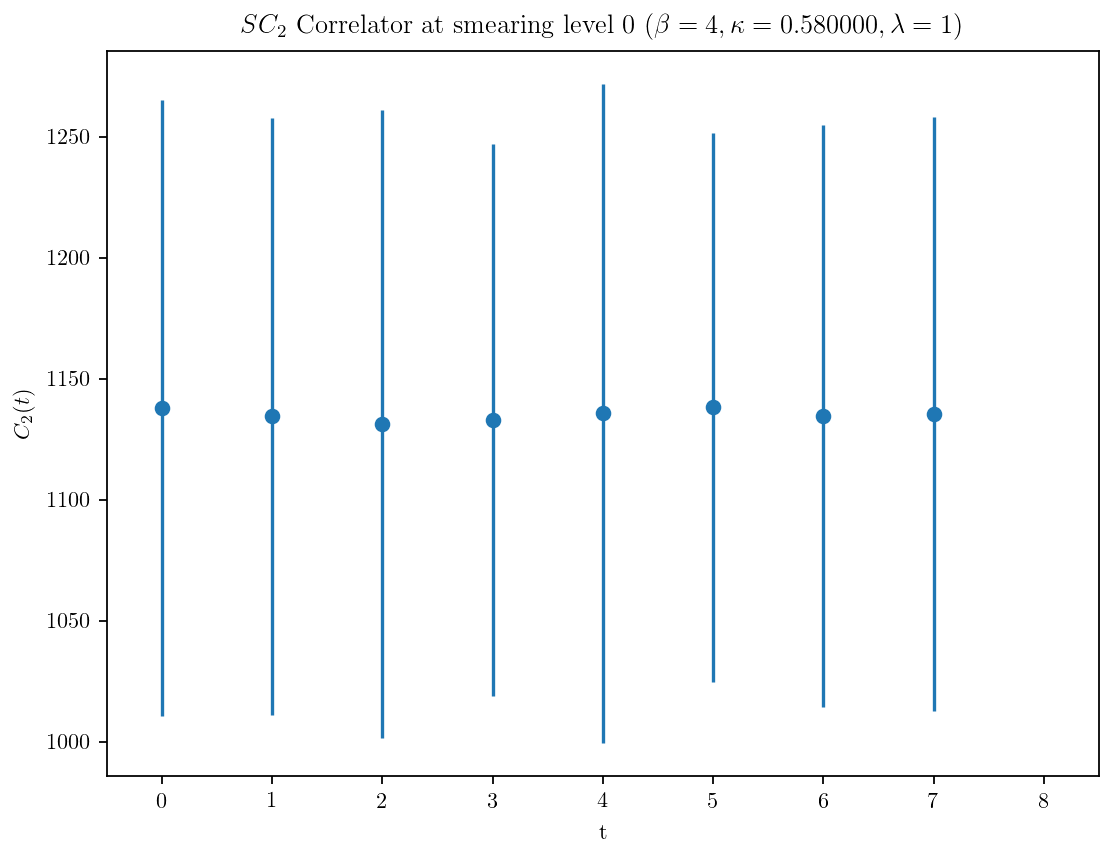

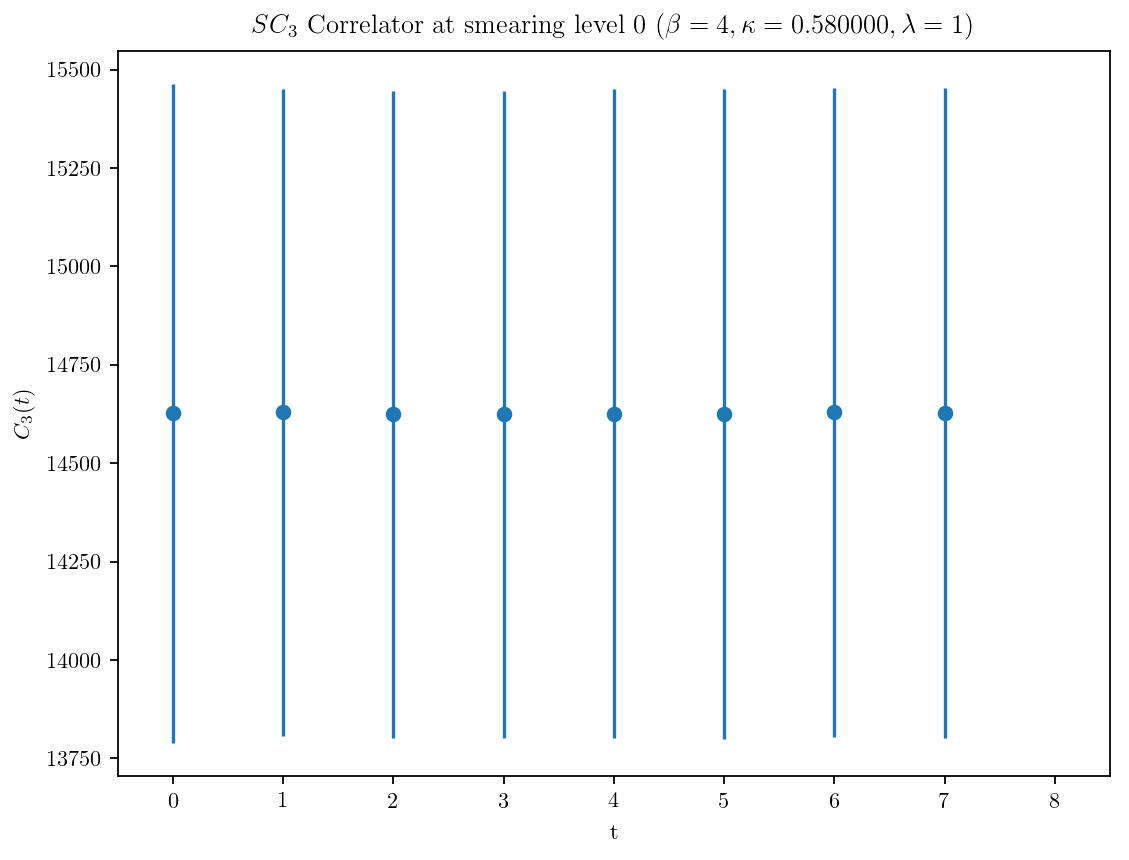

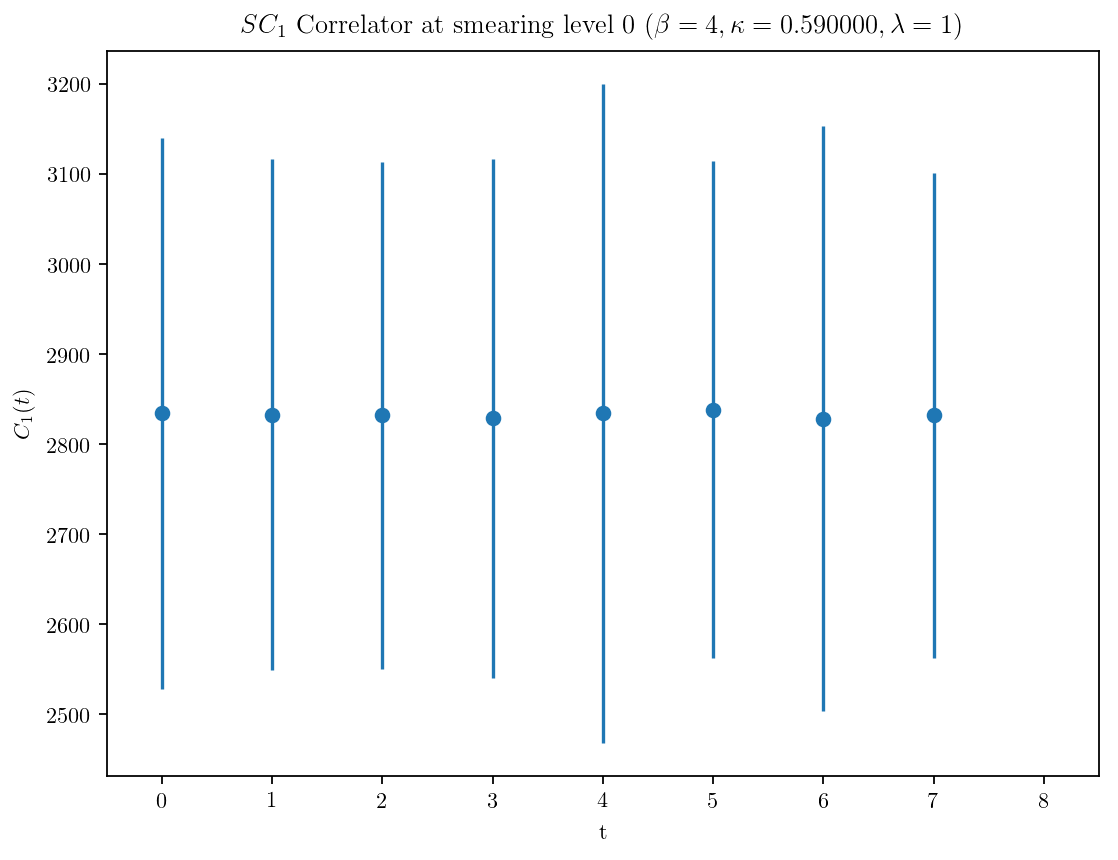

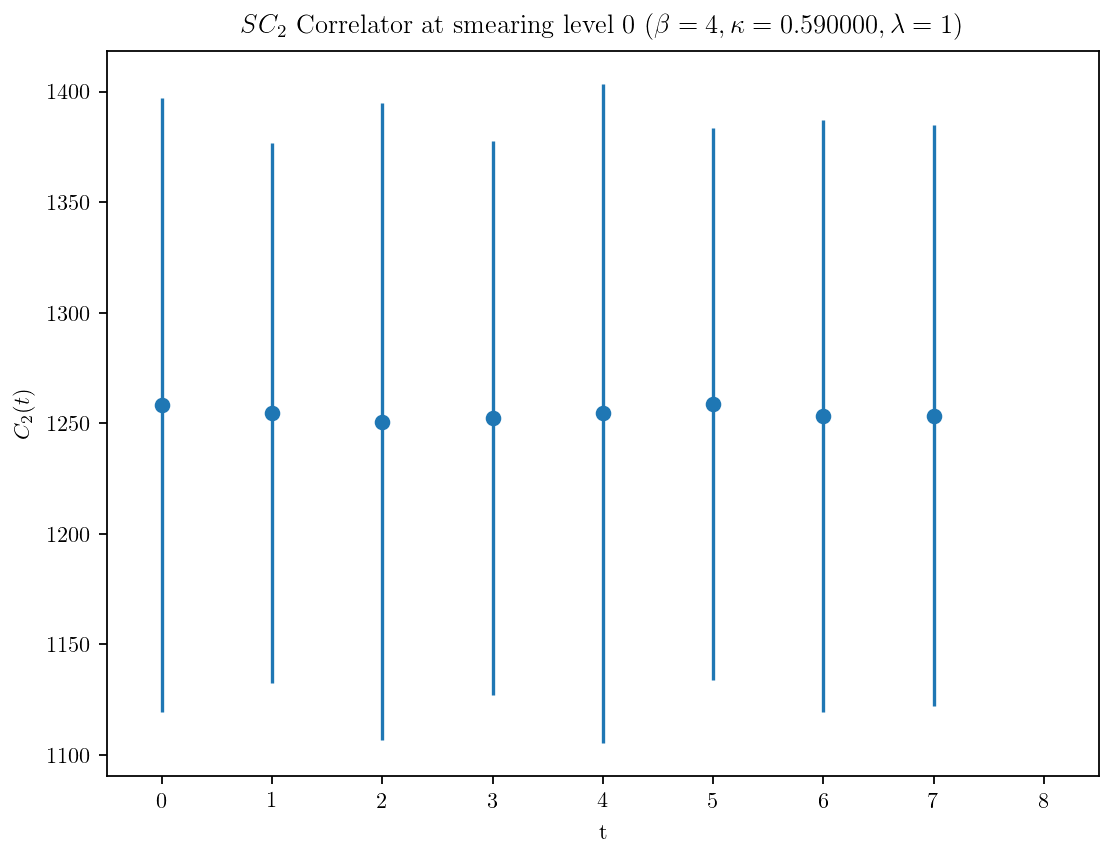

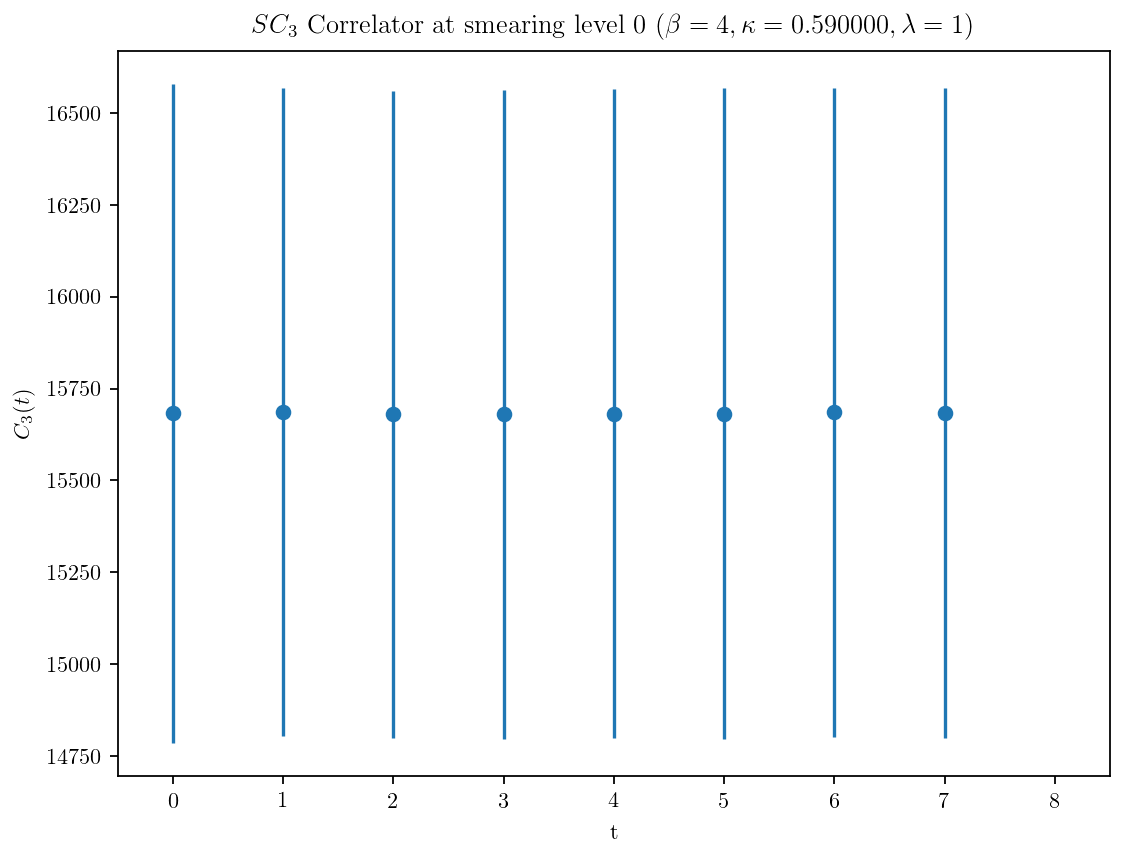

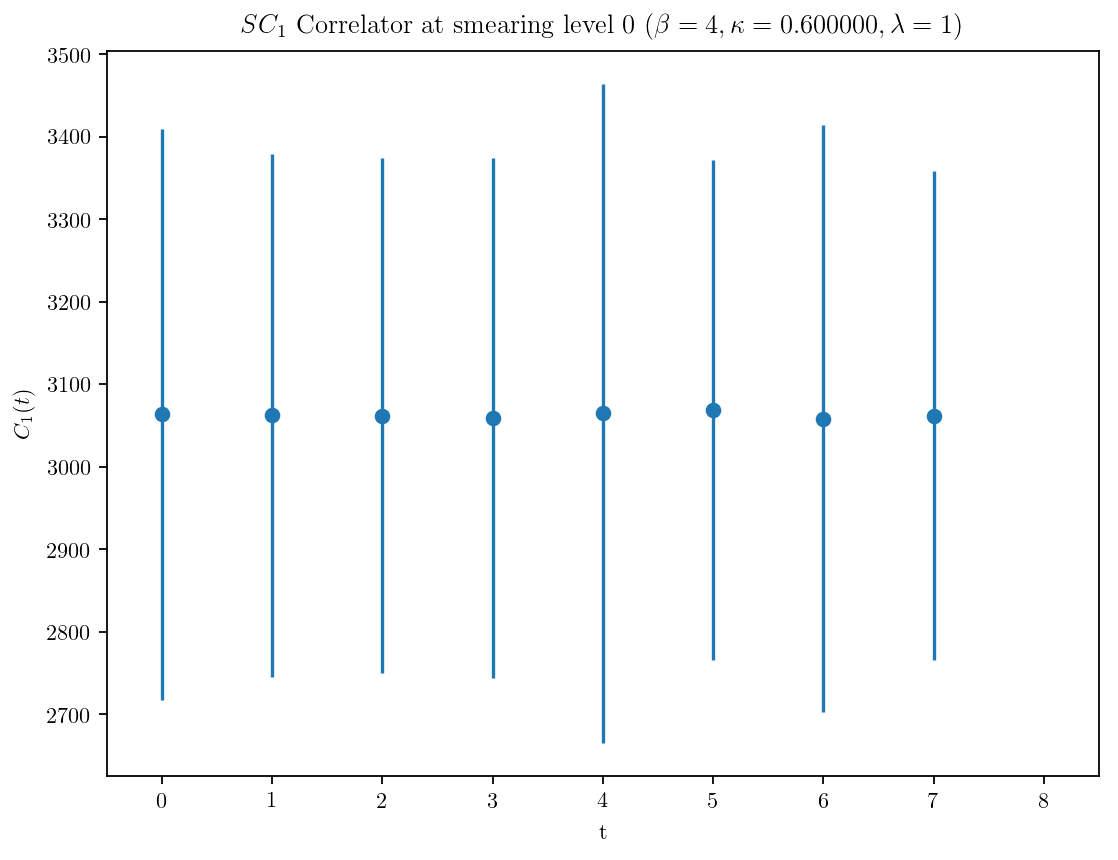

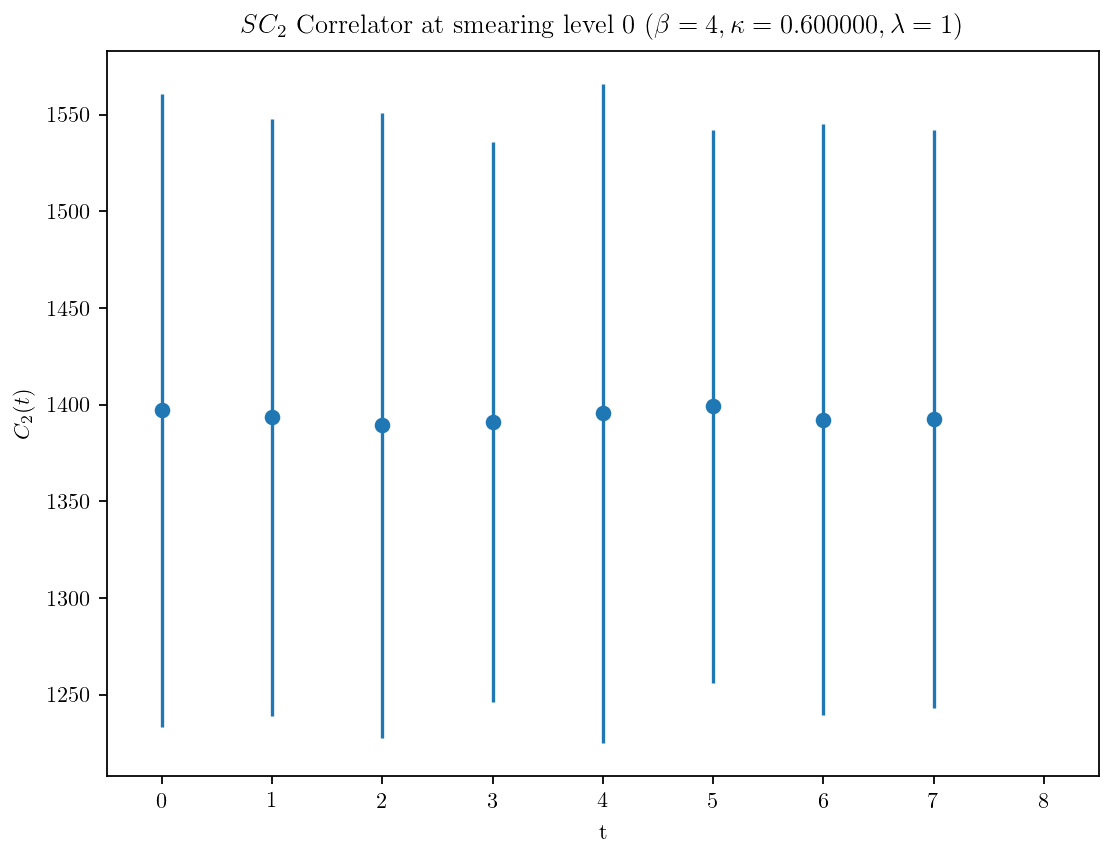

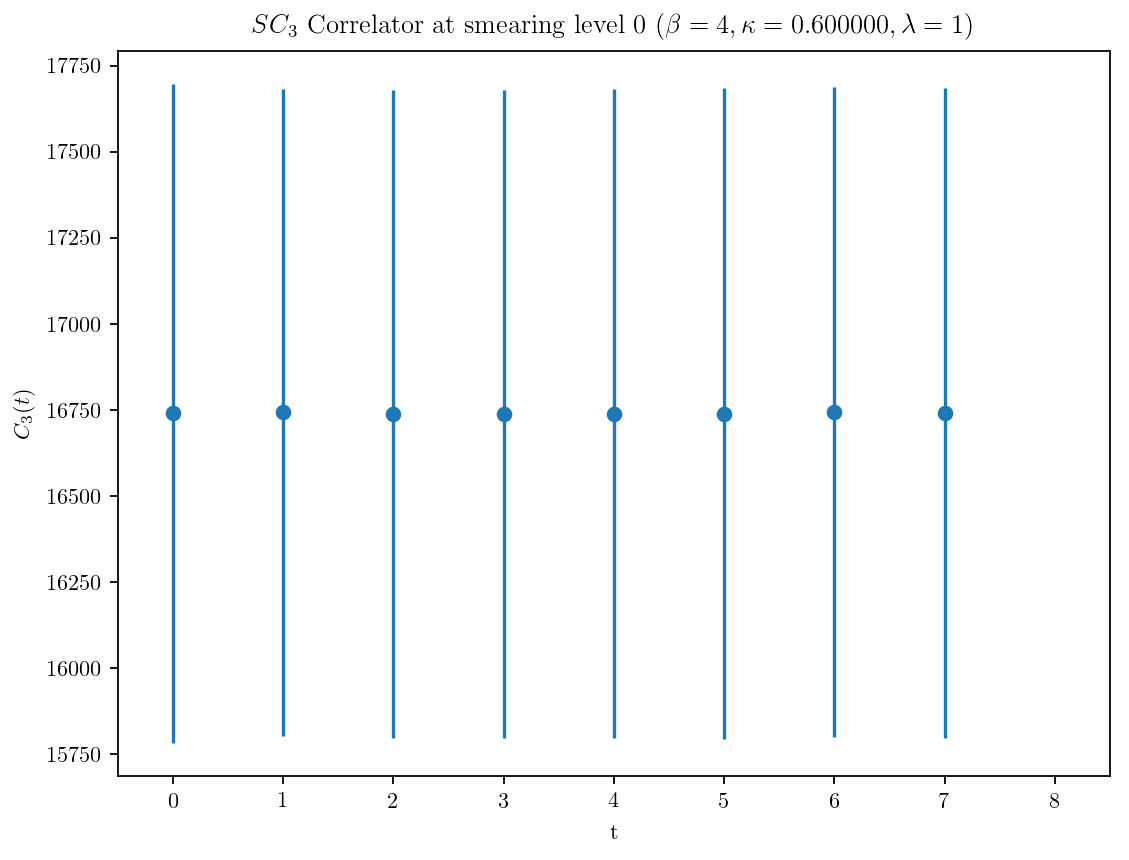

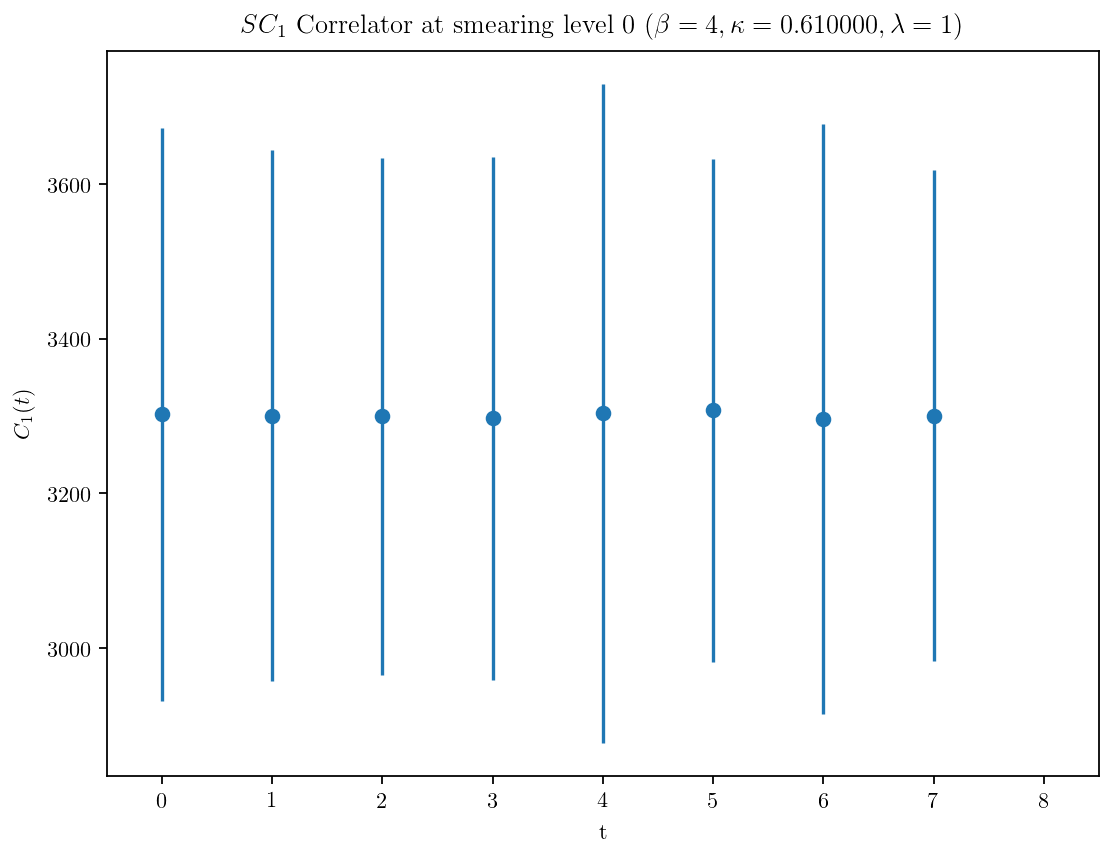

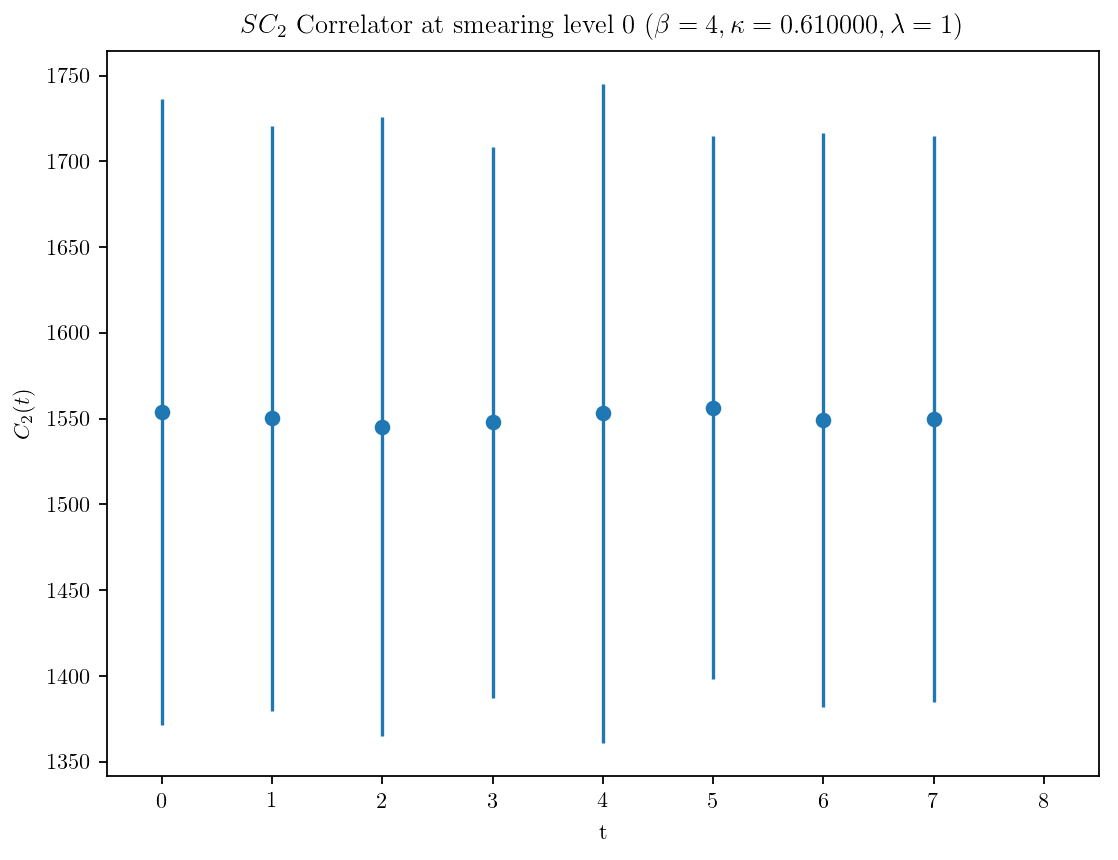

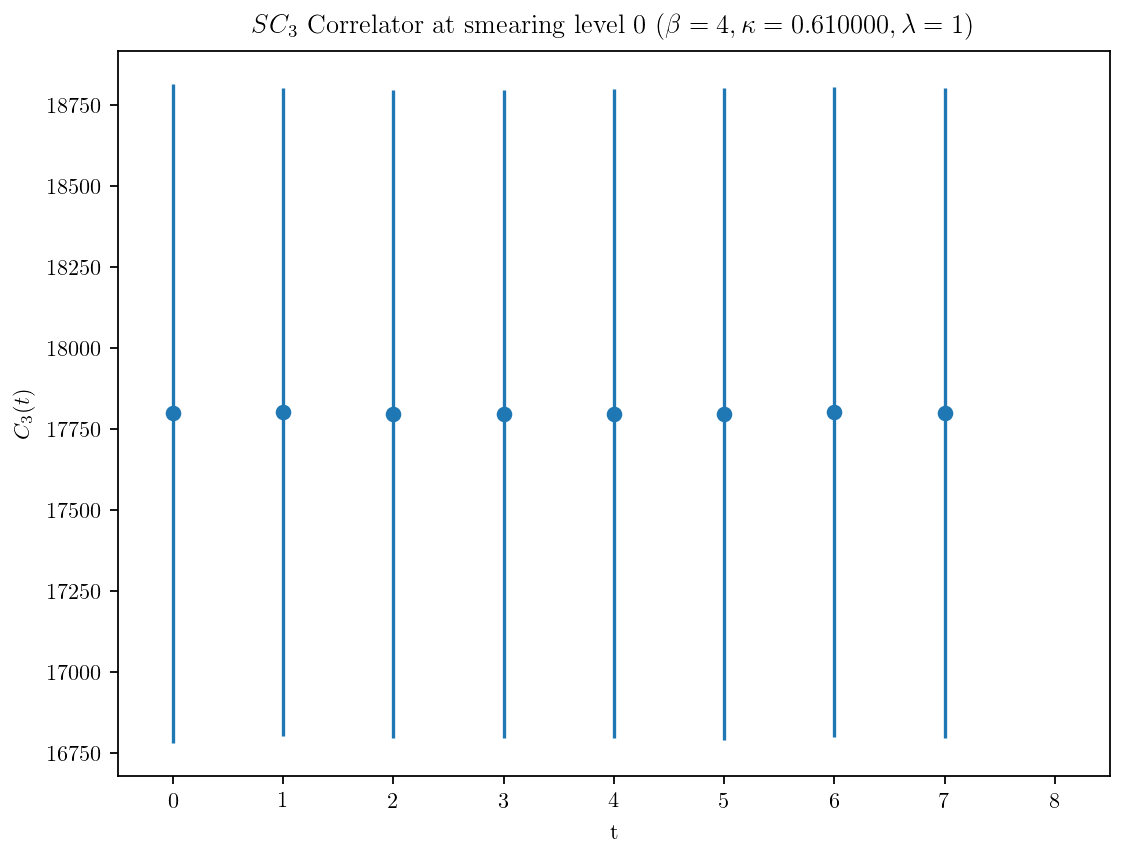

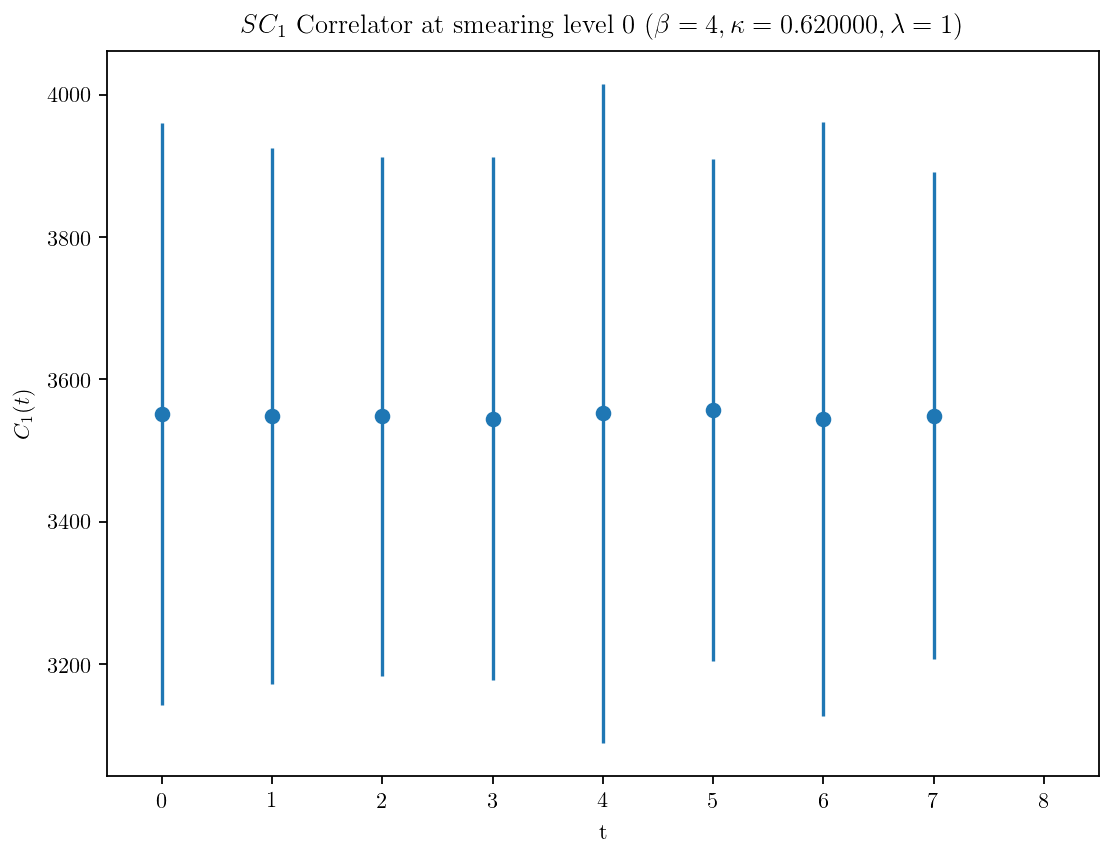

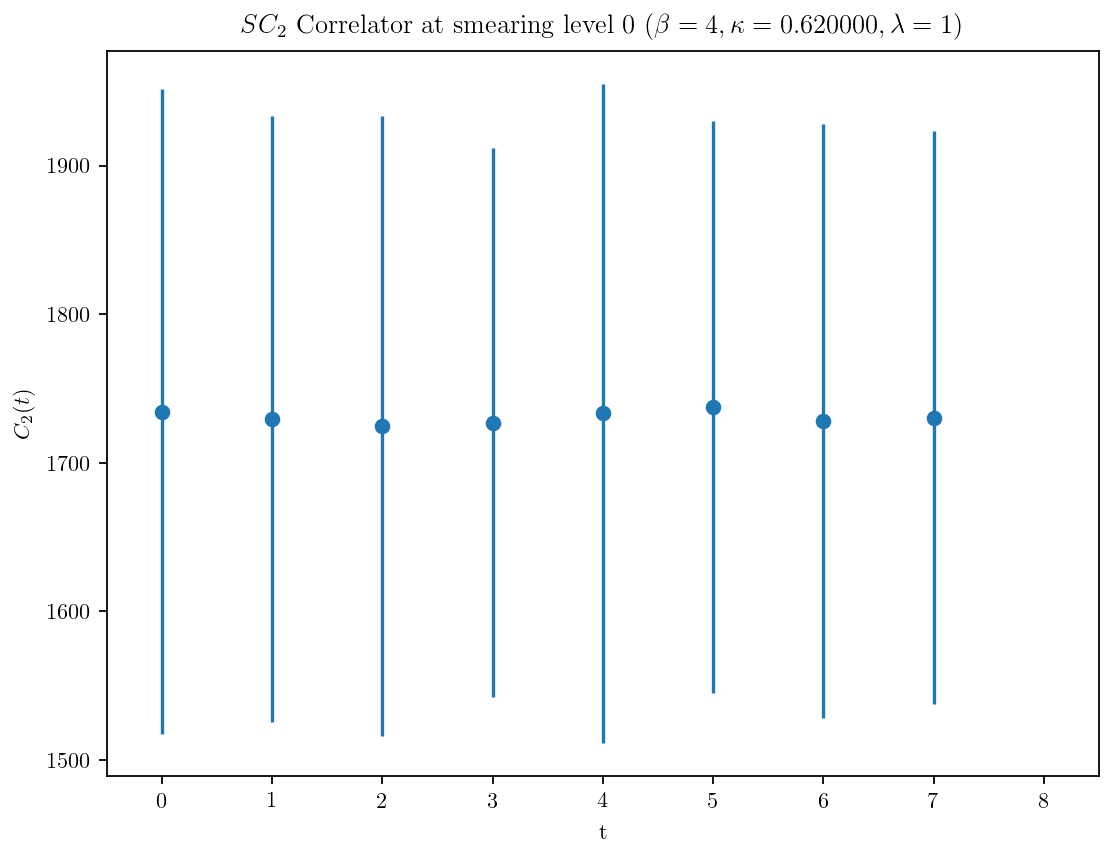

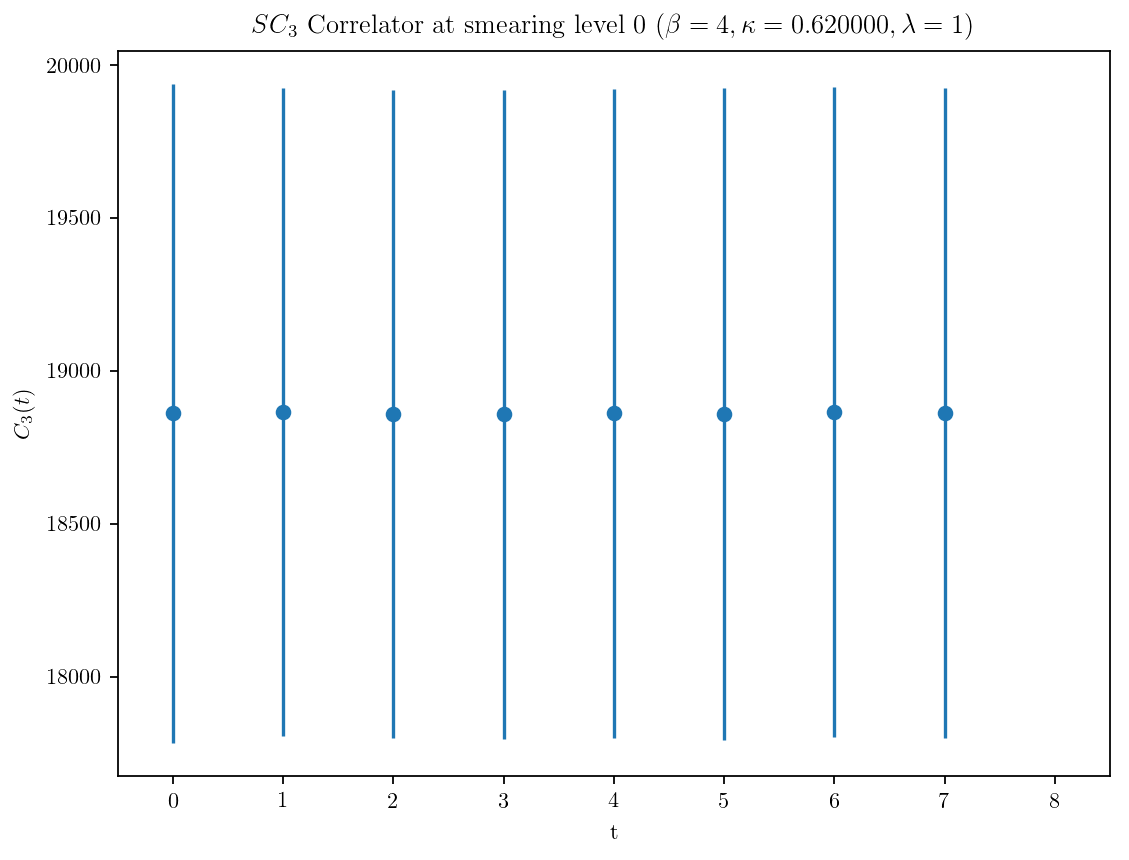

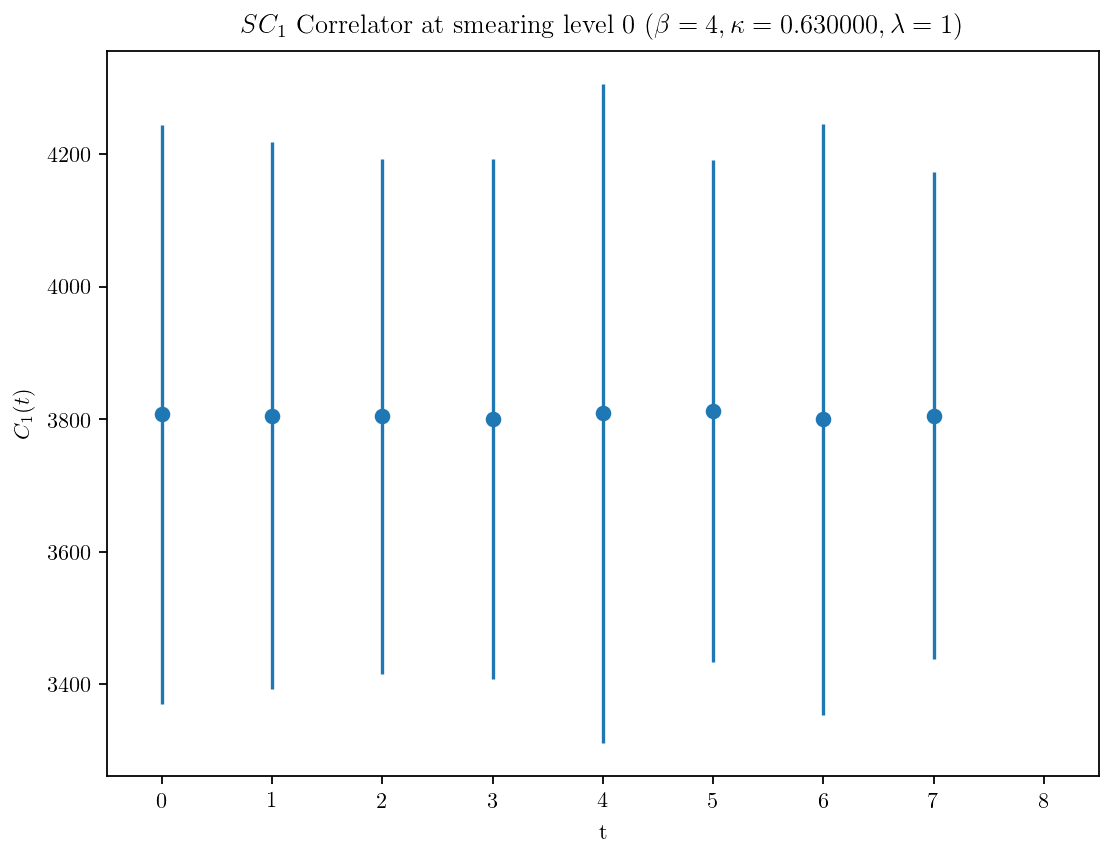

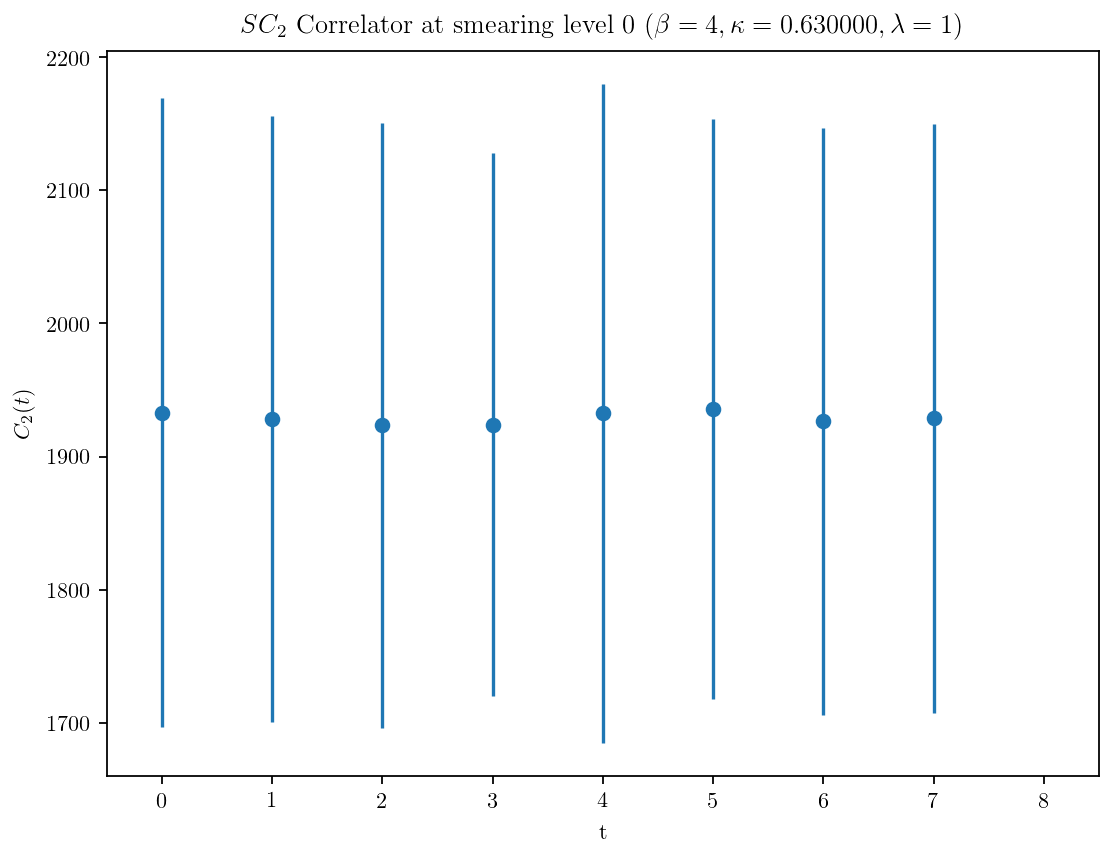

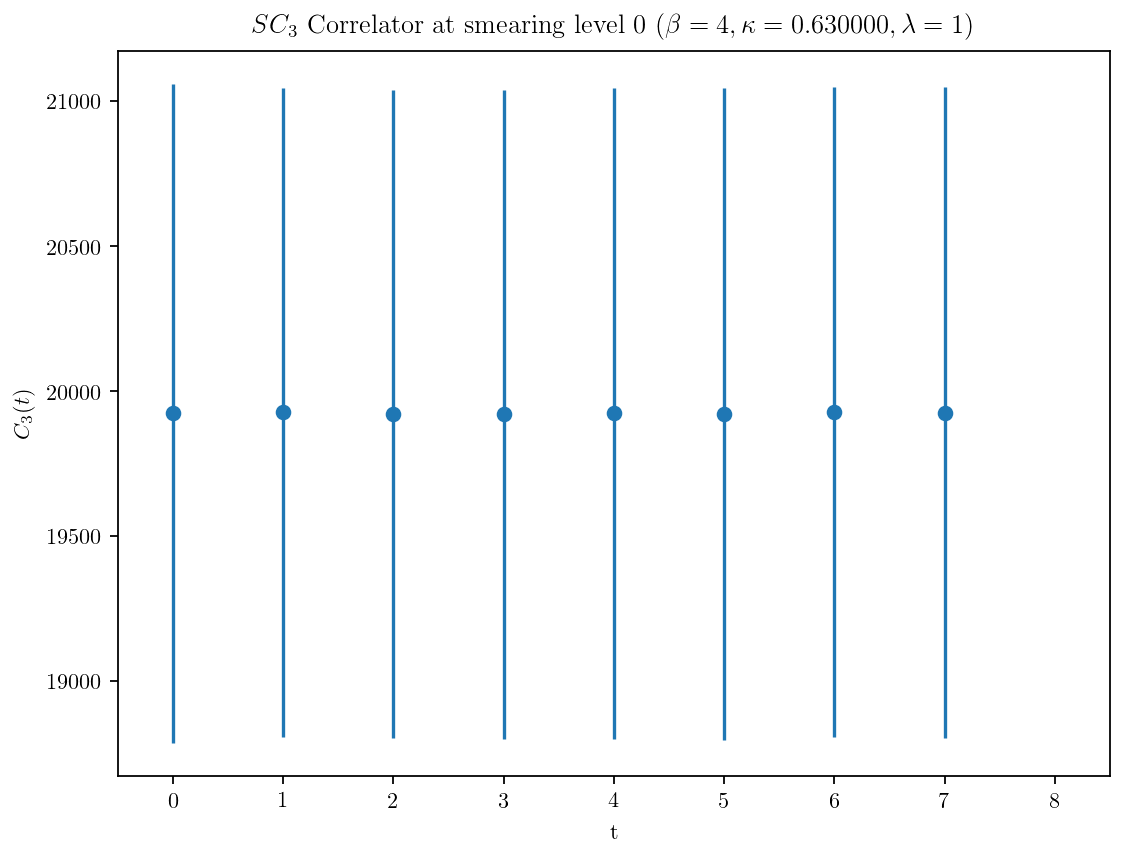

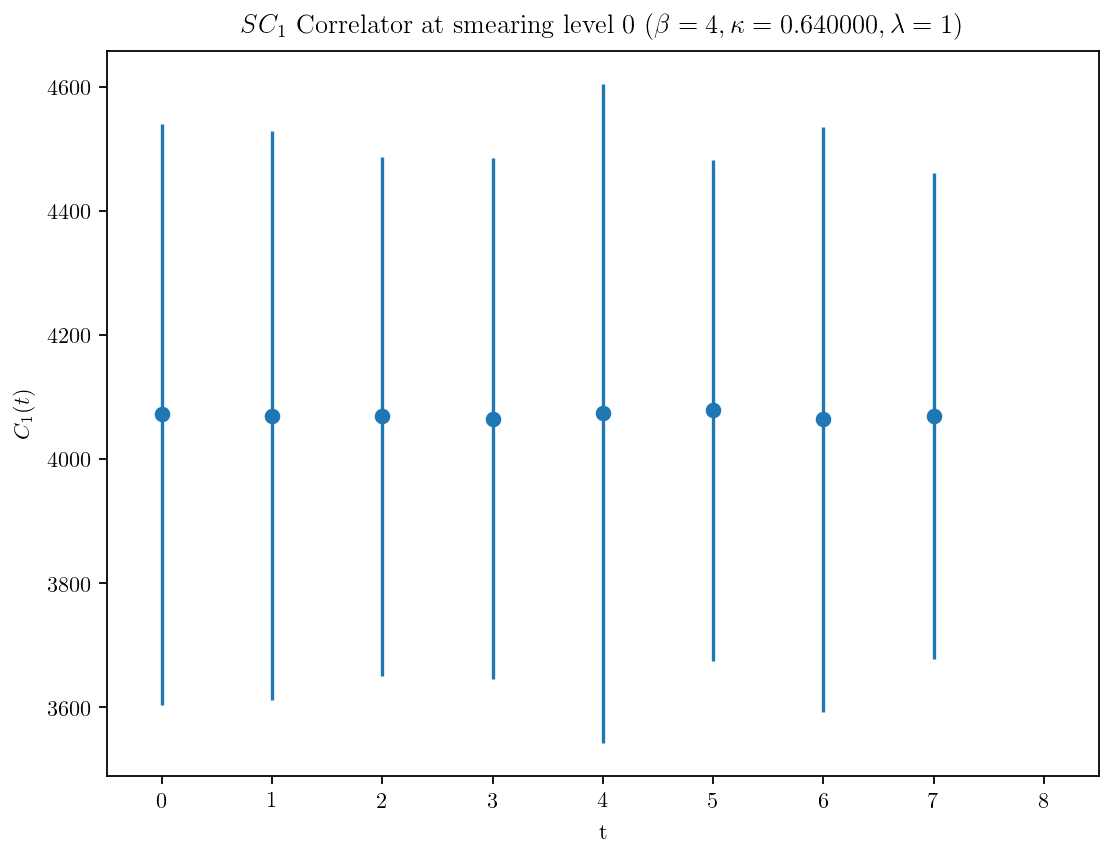

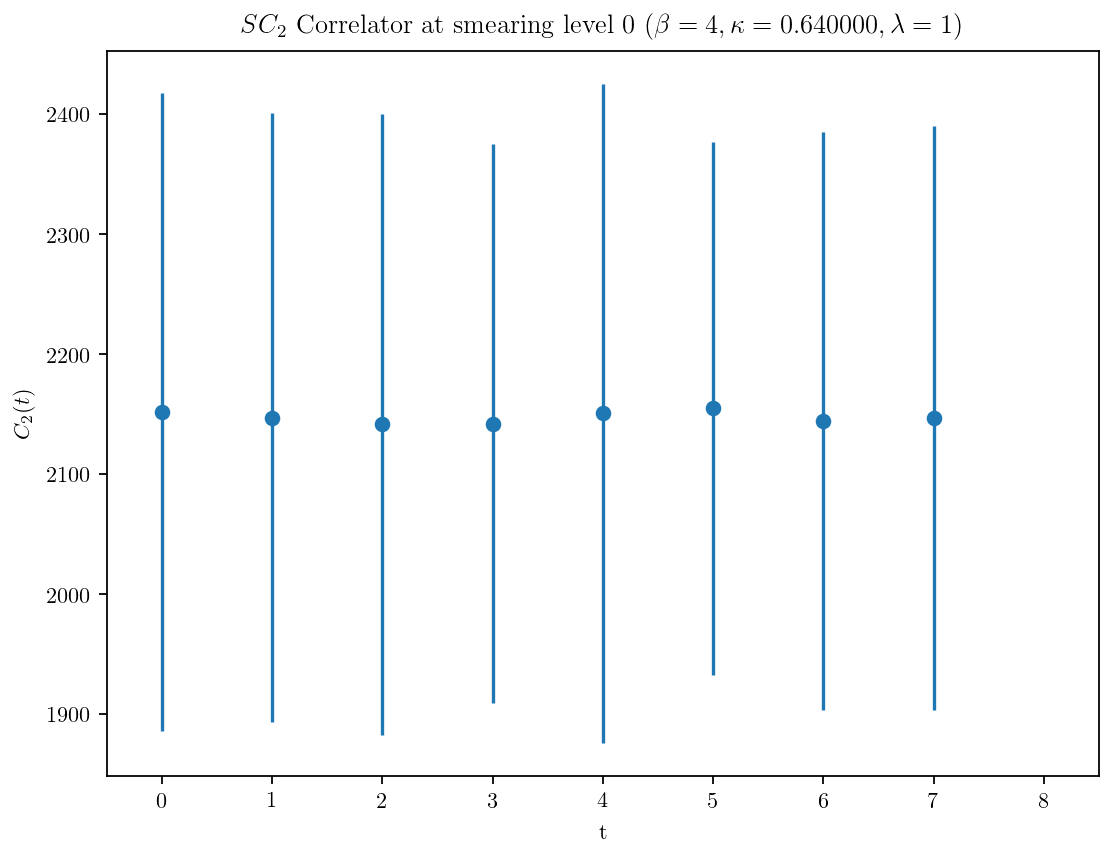

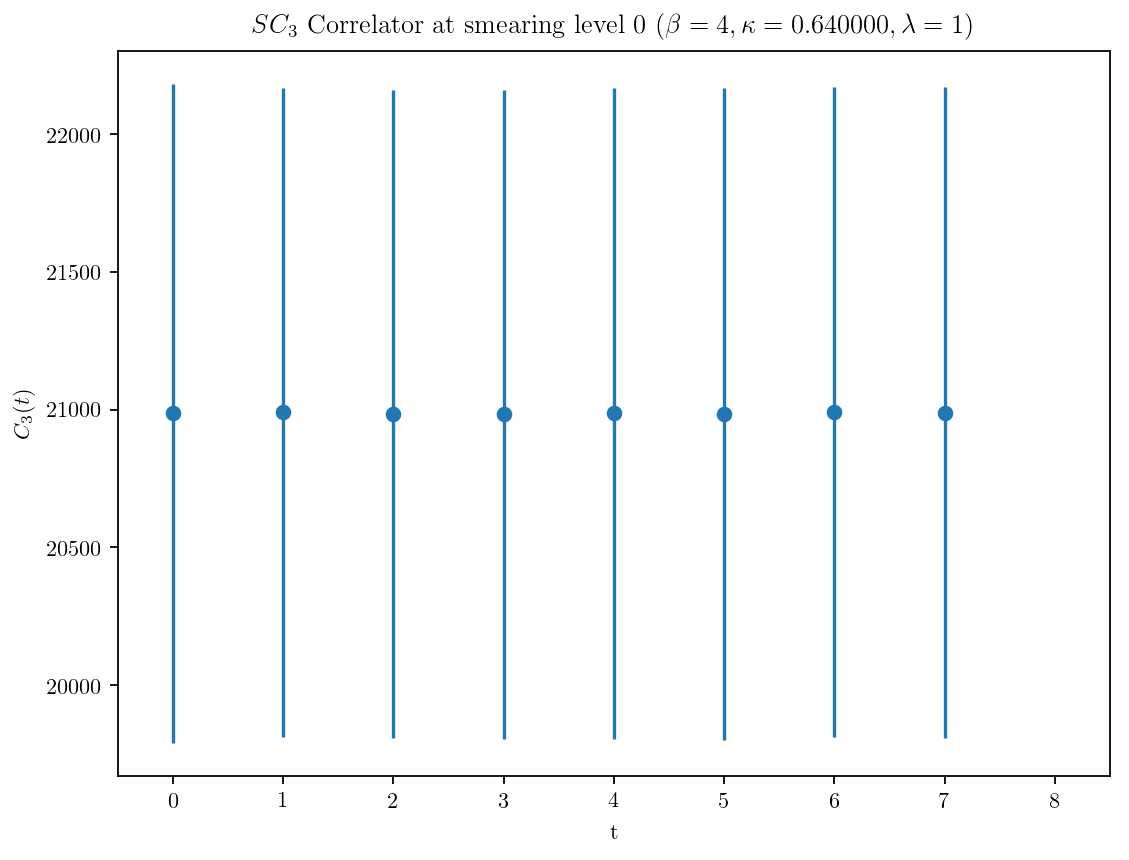

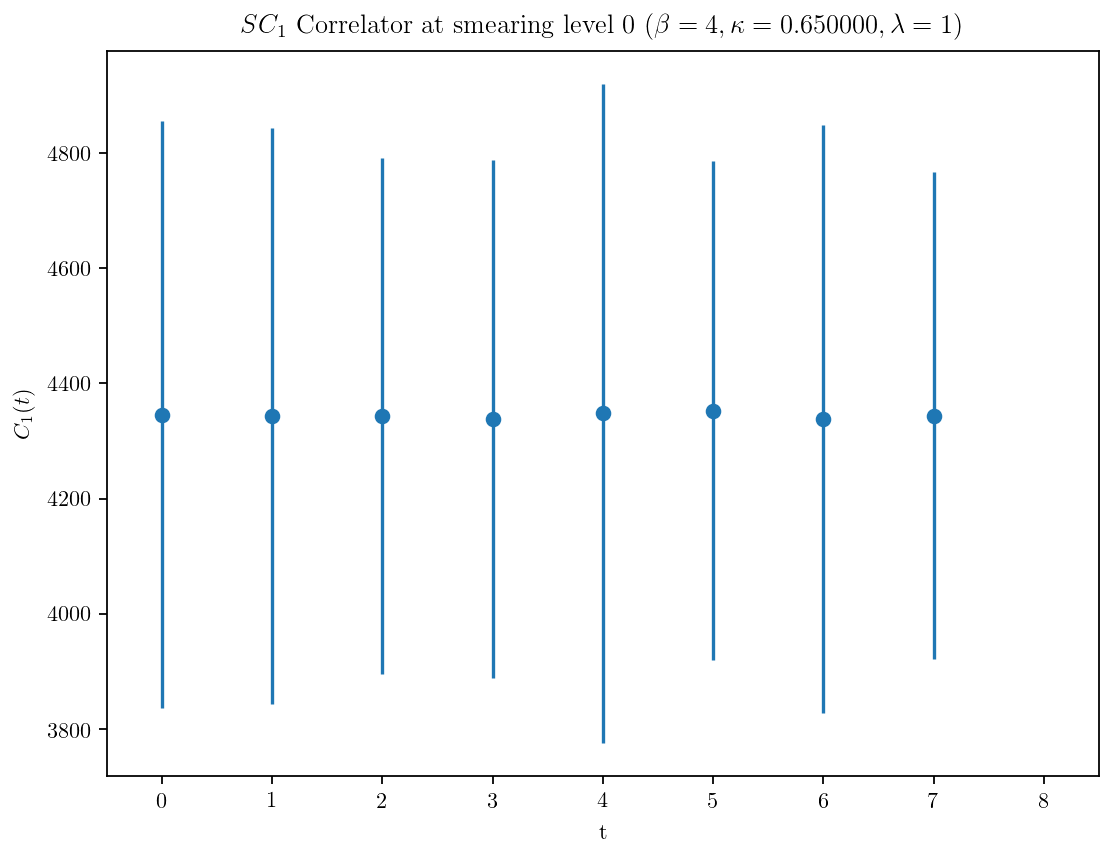

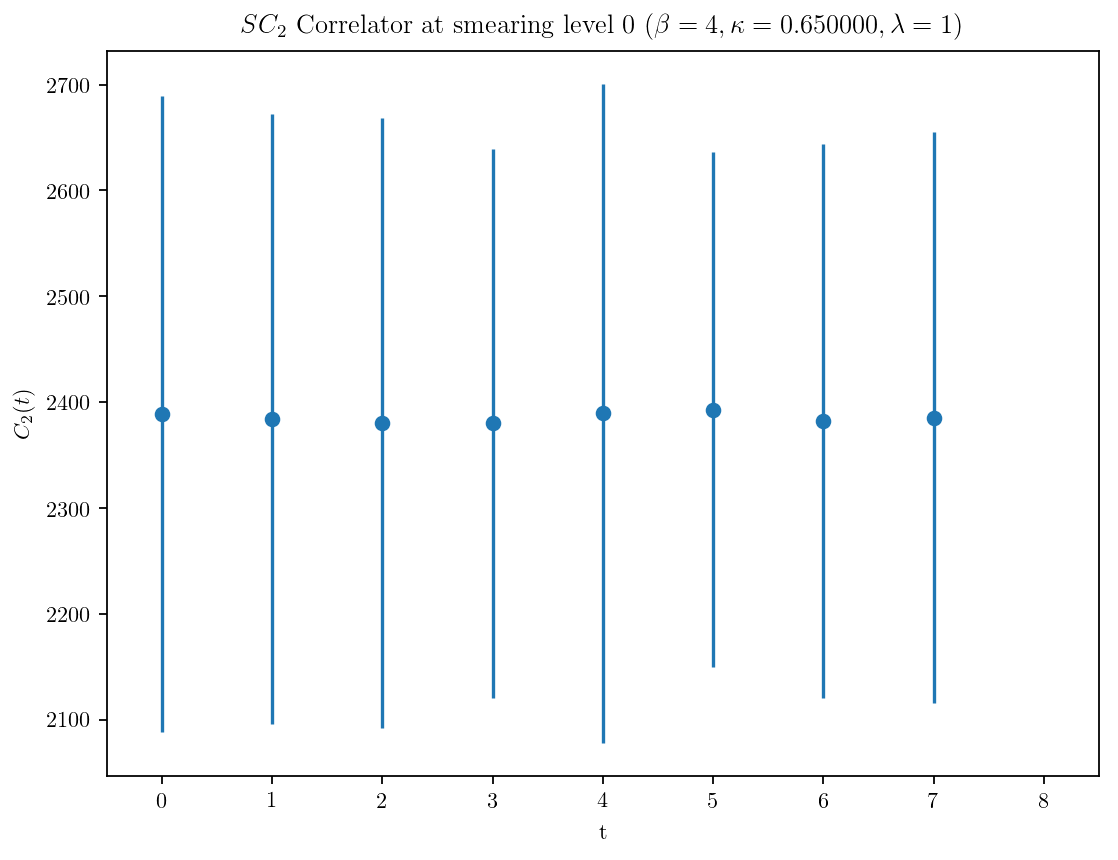

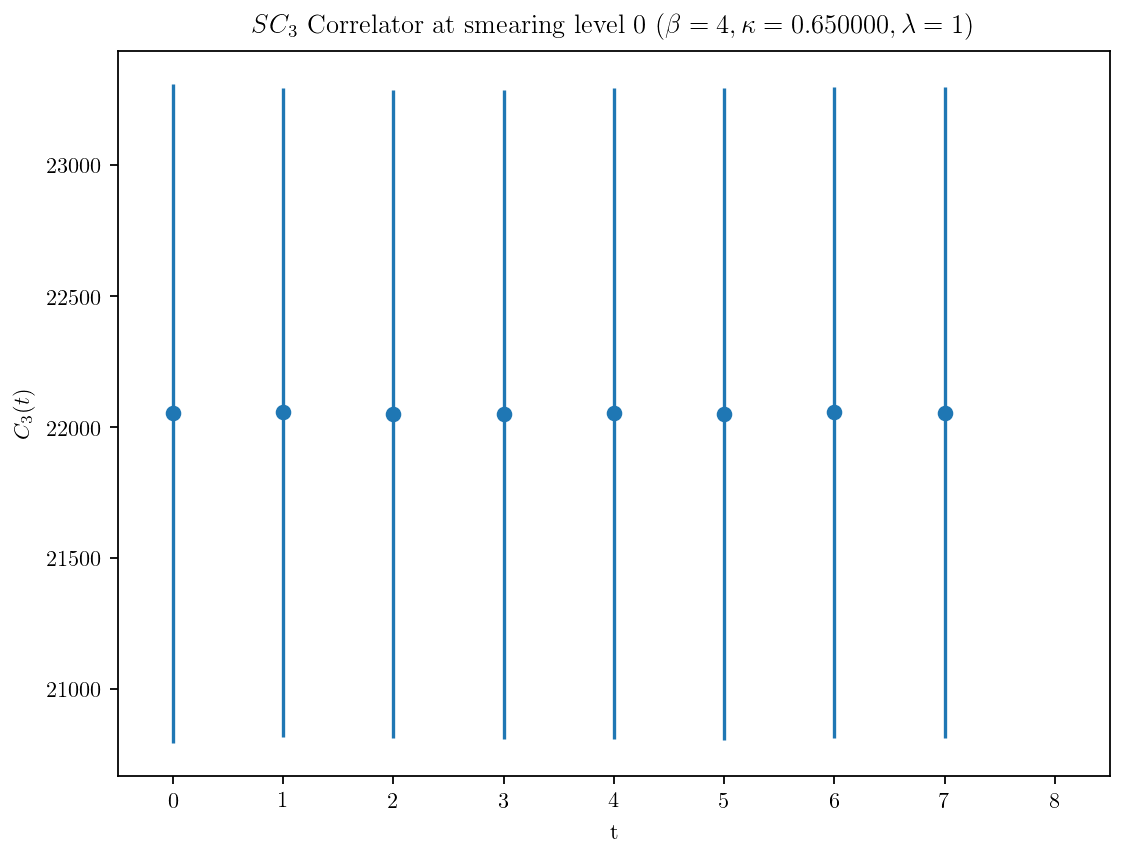

In [11]:
for k in range(21):
    kap = 0.45 +0.01*k
    analysis_plot(kap)